## Understanding the Cleaned Metadata

In [44]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import json

# Path to your MapReduce output file
file_path = 'output_Clean_Main_Category/part-r-00000'

# Initialize empty lists to store data
categories = []
counts = []
total_ratings = []
avg_ratings = []
parent_asins = []

# Read the file and parse each line
with open(file_path, 'r') as file:
    for line in file:
        # MapReduce output is typically in format: key\tvalue
        parts = line.strip().split('\t')
        if len(parts) == 2:
            category = parts[0]
            try:
                # Parse the JSON value
                data = json.loads(parts[1])
                
                # Extract fields
                categories.append(category)
                counts.append(data['count'])
                total_ratings.append(data['total_rating_number'])
                avg_ratings.append(data['average_rating'])
                parent_asins.append(data['parent_asin'])
                
            except json.JSONDecodeError:
                print(f"Error parsing JSON in line: {line}")

# Create DataFrame
df = pd.DataFrame({
    'main_category': categories,
    'count': counts,
    'total_rating_number': total_ratings,
    'average_rating': avg_ratings,
    'parent_asin': parent_asins
})

# Sort by count if needed
df_sorted = df.sort_values(by='count', ascending=False)

meta_df = df_sorted.copy()

# Save the grouped and sorted DataFrame to a CSV file
output_file_path = 'combined_main_categories.csv'
meta_df.to_csv(output_file_path, index=False)

print(f"Data successfully written to {output_file_path}")

# print(meta_df)

meta_df_2print = df_sorted[['main_category', 'count', 'total_rating_number']]
print(meta_df_2print)

# print(meta_df_2print['main_category'])

Data successfully written to combined_main_categories.csv
                        main_category  count  total_rating_number
9                         Video Games  81255             17882290
2                           Computers  17235              6277994
0                     All Electronics  14816              4570555
5                              Others  11150               920804
1  Cell Phone & Camera w. Accessories   4113               691324
3                       Daily Gadgets   3050               510199
8                        Toys & Games   2913               351811
6                            Software   1514               199348
4                               Media    720              2053935
7                     Sports & Health    503                77255


In [45]:
# Path to your MapReduce output file
file_path = 'output_Clean_Main_Category/part-r-00000'

# Initialize empty lists to store data
categories = []
counts = []
total_ratings = []
avg_ratings = []
parent_asins = []

# Read the file and parse each line
with open(file_path, 'r') as file:
    for line in file:
        # MapReduce output is typically in format: key\tvalue
        parts = line.strip().split('\t')
        if len(parts) == 2:
            category = parts[0]
            try:
                # Parse the JSON value
                data = json.loads(parts[1])
                
                # Extract fields
                categories.append(category)
                counts.append(data['count'])
                total_ratings.append(data['total_rating_number'])
                avg_ratings.append(data['average_rating'])
                parent_asins.append(data['parent_asin'])
                
            except json.JSONDecodeError:
                print(f"Error parsing JSON in line: {line}")

# Create DataFrame
df = pd.DataFrame({
    'main_category': categories,
    'count': counts,
    'total_rating_number': total_ratings,
    'average_rating': avg_ratings,
    'parent_asin': parent_asins
})

# Sort by count if needed
df_sorted = df.sort_values(by='count', ascending=False)

meta_df = df_sorted.copy()

print(meta_df.head())

                        main_category  count  total_rating_number  \
9                         Video Games  81255             17882290   
2                           Computers  17235              6277994   
0                     All Electronics  14816              4570555   
5                              Others  11150               920804   
1  Cell Phone & Camera w. Accessories   4113               691324   

   average_rating                                        parent_asin  
9        3.945954  [B001RNO1LI, B07Y8NXJ83, B0002B90SU, B00YARF1S...  
2        4.076198  [B0000DG9SJ, B081ZPYLRZ, B079MB4RNY, B01MDNSQO...  
0        4.096246  [B083GHBS6B, B0C5X97746, B088ZG6Q82, B00GTAUAS...  
5        3.938170  [B0BBTN59KL, B08PS16SZY, B0017GHAWW, B01MRXIZC...  
1        4.116244  [B07TNR1SLB, B0827RCY2Q, B08SC7DGQ3, B0BPLVT3Z...  


## Showcase of Average Rating & Number of Rating Trends by Main Category

### Setting Up

In [46]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import json

# Initialize empty lists to store data
parent_asin_list = []
time_period_list = []
average_rating_list = []
rating_count_list = []

# Read the document file line-by-line
with open('output_Temporal_Trends_All/part-r-00000-TTA', 'r') as file:
    for line in file:
        # Use regex to extract data from each line
        match = re.search(r'"parent_asin":(\S+), "time_period":(\S+)\s+"average_rating":(\d+\.\d+), "rating_count":(\d+)', line)
        if match:
            parent_asin_list.append(match.group(1))
            time_period_list.append(match.group(2))
            average_rating_list.append(float(match.group(3)))
            rating_count_list.append(int(match.group(4)))

# Create DataFrame from the extracted data
df = pd.DataFrame({
    'parent_asin': parent_asin_list,
    'time_period': time_period_list,
    'average_rating': average_rating_list,
    'rating_count': rating_count_list
})

# Convert time_period to datetime and extract the year
df['year'] = pd.to_datetime(df['time_period']).dt.year

# Filter for data between 2022 and 2023
filtered_df = df[(df['year'] >= 2019) & (df['year'] <= 2023)]

filtered_df = filtered_df.sort_values(by=['rating_count'], ascending=False)

trends_df = filtered_df.copy()

print(trends_df.head())

        parent_asin time_period  average_rating  rating_count  year
1272341  B0BN942894     2021-03            4.50          1300  2021
911081   B07DK1H3H5     2020-12            2.31          1229  2020
1272338  B0BN942894     2020-12            4.71          1006  2020
1272339  B0BN942894     2021-01            4.59           994  2021
1233545  B09XM8MMYD     2022-01            4.33           877  2022


In [47]:
# Path to your MapReduce output file
file_path = 'output_Clean_Main_Category/part-r-00000'

# Initialize empty lists to store data
categories = []
counts = []
total_ratings = []
avg_ratings = []
parent_asins = []

# Read the file and parse each line
with open(file_path, 'r') as file:
    for line in file:
        # MapReduce output is typically in format: key\tvalue
        parts = line.strip().split('\t')
        if len(parts) == 2:
            category = parts[0]
            try:
                # Parse the JSON value
                data = json.loads(parts[1])
                
                # Extract fields
                categories.append(category)
                counts.append(data['count'])
                total_ratings.append(data['total_rating_number'])
                avg_ratings.append(data['average_rating'])
                parent_asins.append(data['parent_asin'])
                
            except json.JSONDecodeError:
                print(f"Error parsing JSON in line: {line}")

# Create DataFrame
df = pd.DataFrame({
    'main_category': categories,
    'count': counts,
    'total_rating_number': total_ratings,
    'average_rating': avg_ratings,
    'parent_asin': parent_asins
})

# Sort by count if needed
df_sorted = df.sort_values(by='count', ascending=False)

meta_df = df_sorted.copy()

print(meta_df.head())

                        main_category  count  total_rating_number  \
9                         Video Games  81255             17882290   
2                           Computers  17235              6277994   
0                     All Electronics  14816              4570555   
5                              Others  11150               920804   
1  Cell Phone & Camera w. Accessories   4113               691324   

   average_rating                                        parent_asin  
9        3.945954  [B001RNO1LI, B07Y8NXJ83, B0002B90SU, B00YARF1S...  
2        4.076198  [B0000DG9SJ, B081ZPYLRZ, B079MB4RNY, B01MDNSQO...  
0        4.096246  [B083GHBS6B, B0C5X97746, B088ZG6Q82, B00GTAUAS...  
5        3.938170  [B0BBTN59KL, B08PS16SZY, B0017GHAWW, B01MRXIZC...  
1        4.116244  [B07TNR1SLB, B0827RCY2Q, B08SC7DGQ3, B0BPLVT3Z...  


In [48]:
# Step 1: Flatten meta_df's 'parent_asin' column
meta_df_flat = meta_df.explode('parent_asin')

# Step 2: Merge trends_df with meta_df_flat on 'parent_asin' to assign main_category to each product
merged_df = pd.merge(trends_df, meta_df_flat[['parent_asin', 'main_category']], on='parent_asin', how='left')

# Step 3: Group by main_category and time_period, and aggregate the data
agg_df = merged_df.groupby(['main_category', 'time_period']).agg(
    average_rating=('average_rating', 'mean'),
    rating_count=('rating_count', 'sum')
).reset_index()

# Step 4: Visualize the data for each main_category separately
unique_categories = agg_df['main_category'].unique()

# Define month names for X-axis
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Step 1: Extract the month from 'time_period'
agg_df['month'] = pd.to_datetime(agg_df['time_period']).dt.month_name().str[:3]  # Extract month as abbreviated name

# Step 2: Extract year from 'time_period' column
agg_df['year'] = pd.to_datetime(agg_df['time_period']).dt.year

print(agg_df.head())


     main_category time_period  average_rating  rating_count month  year
0  All Electronics     2019-01        4.104968          7266   Jan  2019
1  All Electronics     2019-02        4.011600          4794   Feb  2019
2  All Electronics     2019-03        4.121648          5182   Mar  2019
3  All Electronics     2019-04        4.087085          3961   Apr  2019
4  All Electronics     2019-05        4.095572          4062   May  2019


### Display Monthly Average Rating & Rating Numbers per Main Category for a Year

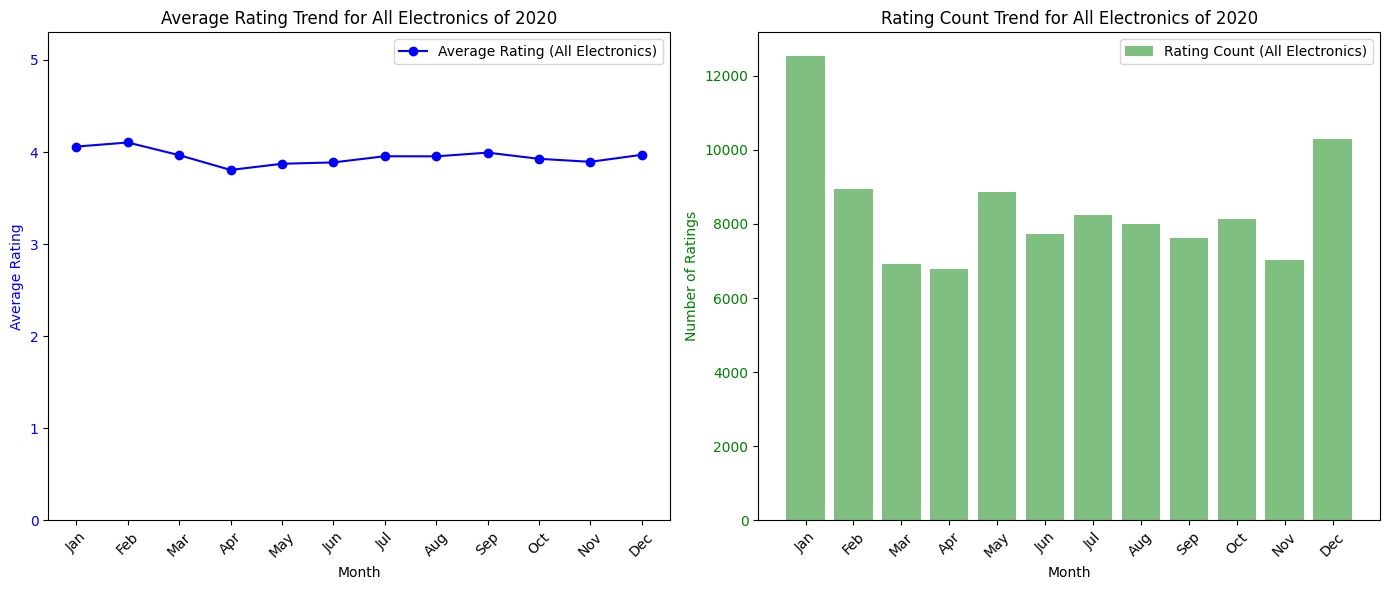

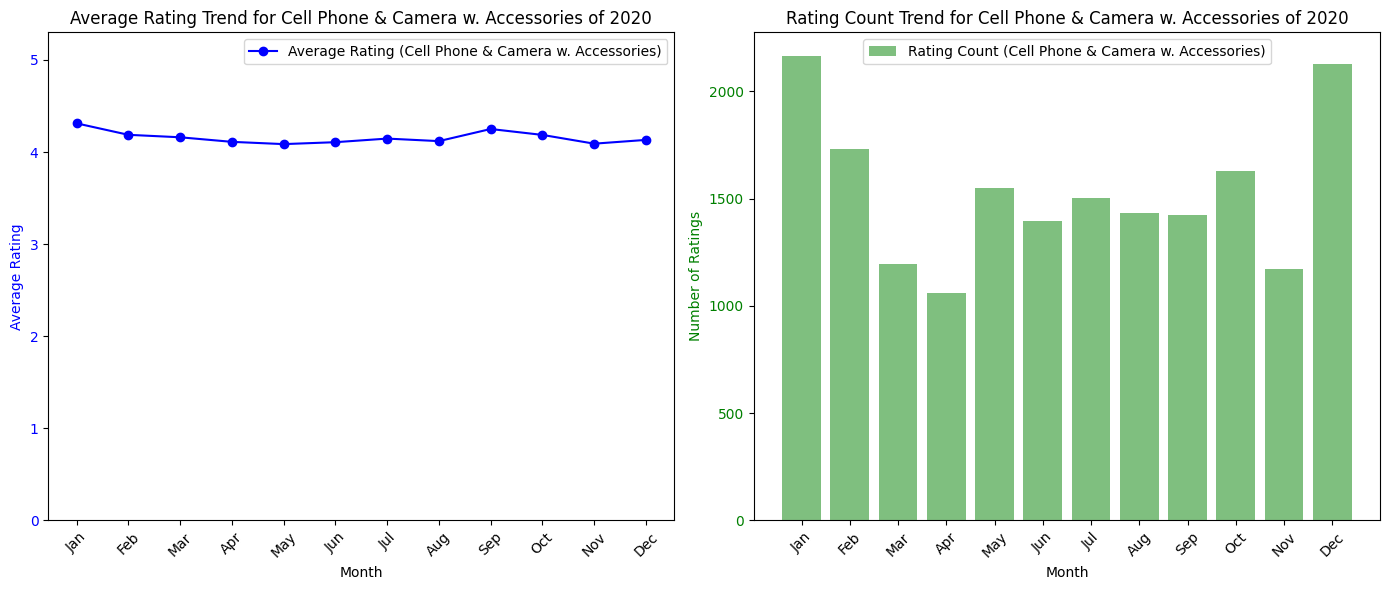

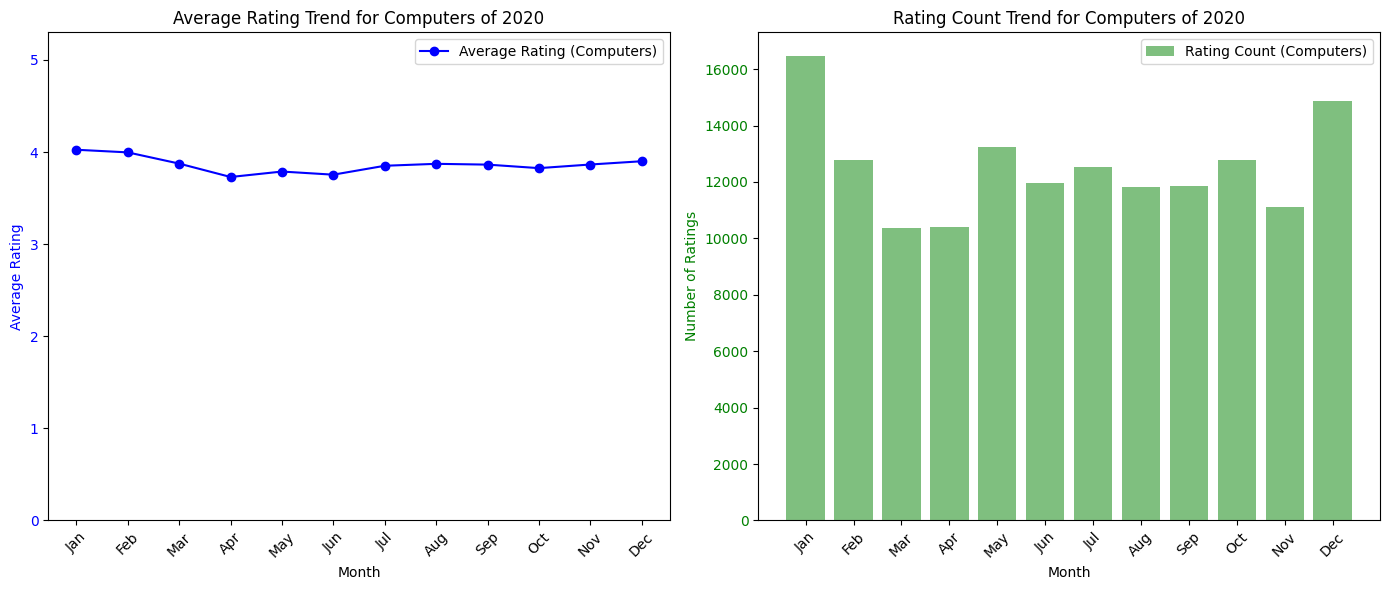

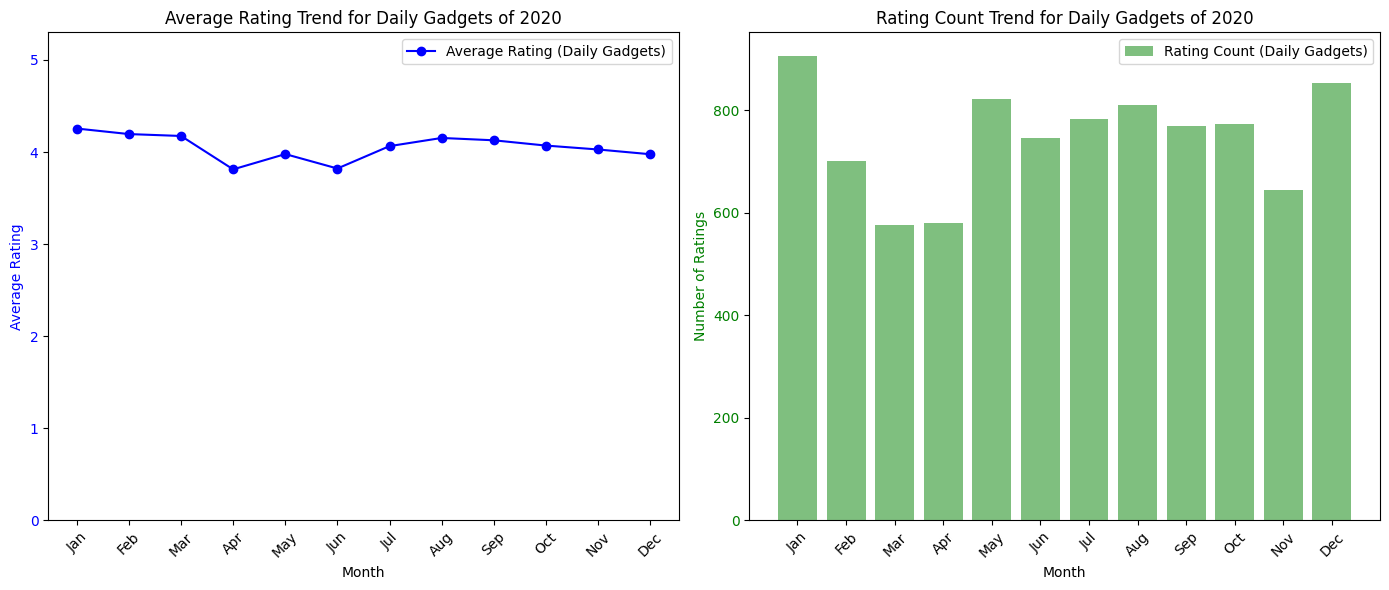

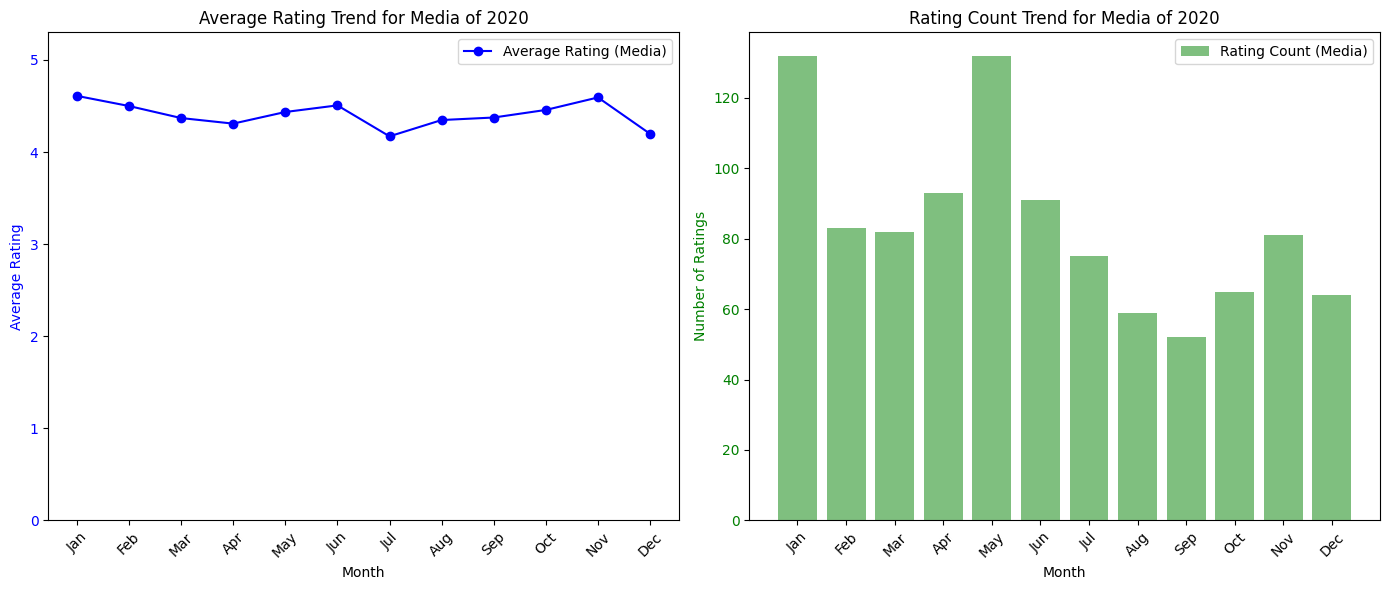

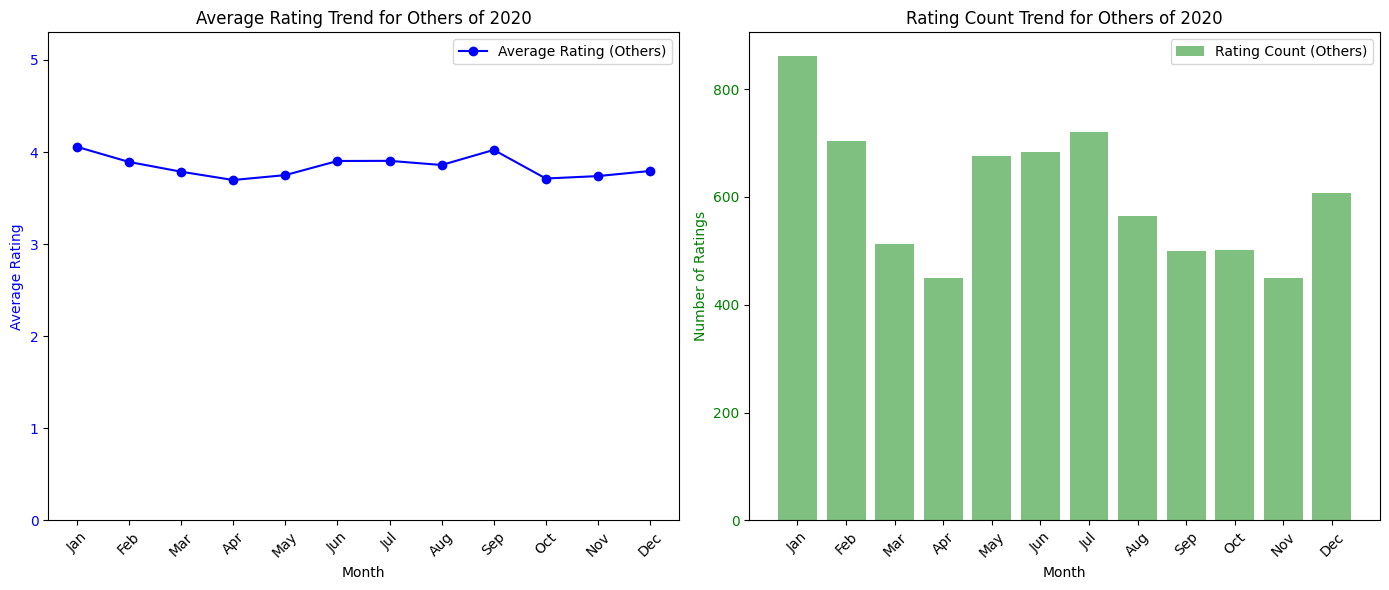

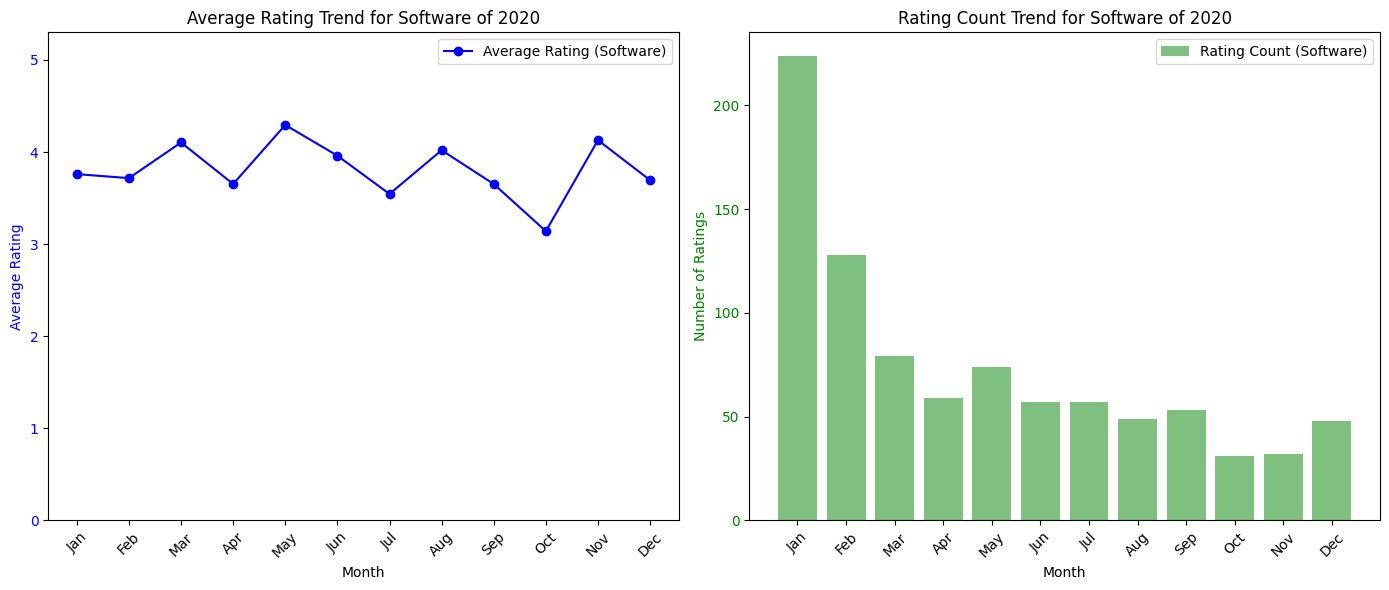

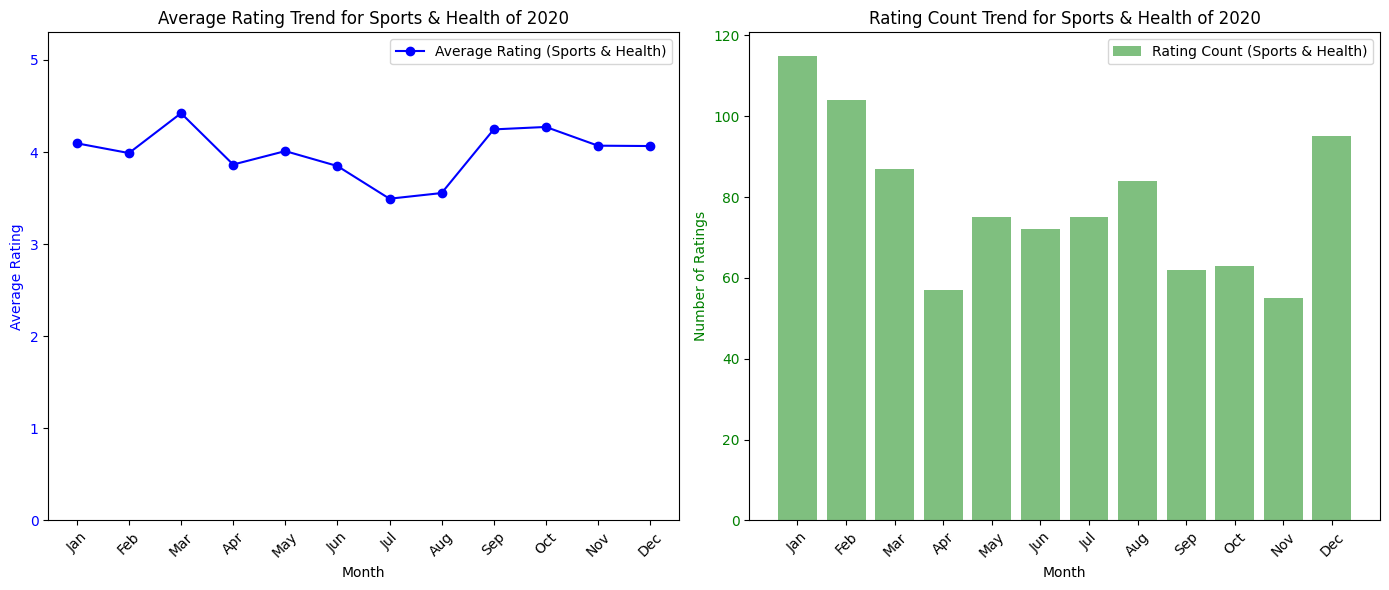

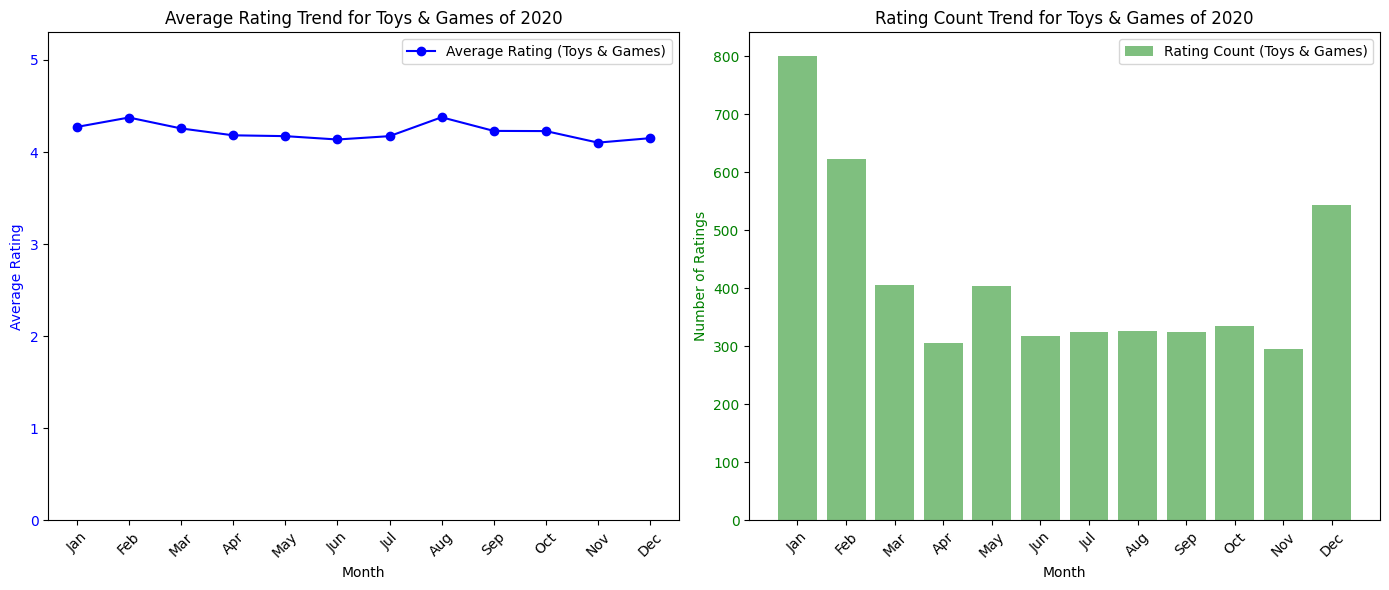

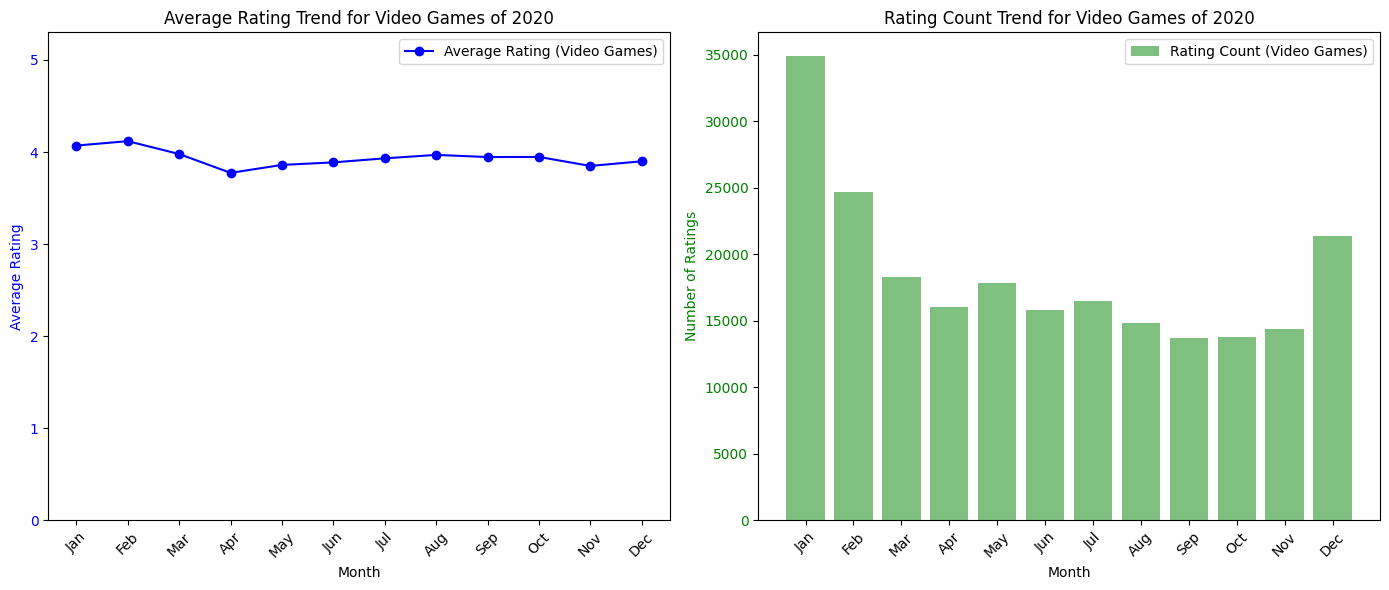

In [49]:
# Set the year to display
year = 2020

# Iterate through each main_category and generate individual plots
for category in unique_categories:
    # Filter the data for the current category and year (2022)
    category_data = agg_df[(agg_df['main_category'] == category) & (agg_df['year'] == year)]
    
    # Create a DataFrame with all months
    all_months_df = pd.DataFrame({
        'month': month_names
    })
    
    # Merge the actual data with the all_months_df, ensuring that all months are represented
    category_data_merged = pd.merge(all_months_df, category_data, on='month', how='left', suffixes=('', '_actual'))
    
    # Fill missing values (NaN) with 0 without modifying the original DataFrame
    category_data_merged['average_rating'] = category_data_merged['average_rating'].fillna(0)
    category_data_merged['rating_count'] = category_data_merged['rating_count'].fillna(0)

    # print(category_data_merged)

    # Create a new figure for each category
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Left subplot: Plot average rating (line plot)
    ax1 = axes[0]
    ax1.plot(category_data_merged['month'], category_data_merged['average_rating'], label=f'Average Rating ({category})', color='b', marker='o')
    ax1.set_title(f'Average Rating Trend for {category} of {year}')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Rating', color='b')
    ax1.tick_params(axis='x', rotation=45)
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.legend()
    ax1.set_ylim(0, 5.3)  # Set y-axis limits to 0-5 for all graphs

    # Right subplot: Plot rating count (bar plot)
    ax2 = axes[1]
    ax2.bar(category_data_merged['month'], category_data_merged['rating_count'], label=f'Rating Count ({category})', alpha=0.5, color='g')
    ax2.set_title(f'Rating Count Trend for {category} of {year}')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Number of Ratings', color='g')
    ax2.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='y', labelcolor='g')
    ax2.legend()

    # Adjust layout to avoid overlapping subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


### Display Monthly Average Rating and Rating Numbers by Main Category for Multiple Years for Comparison

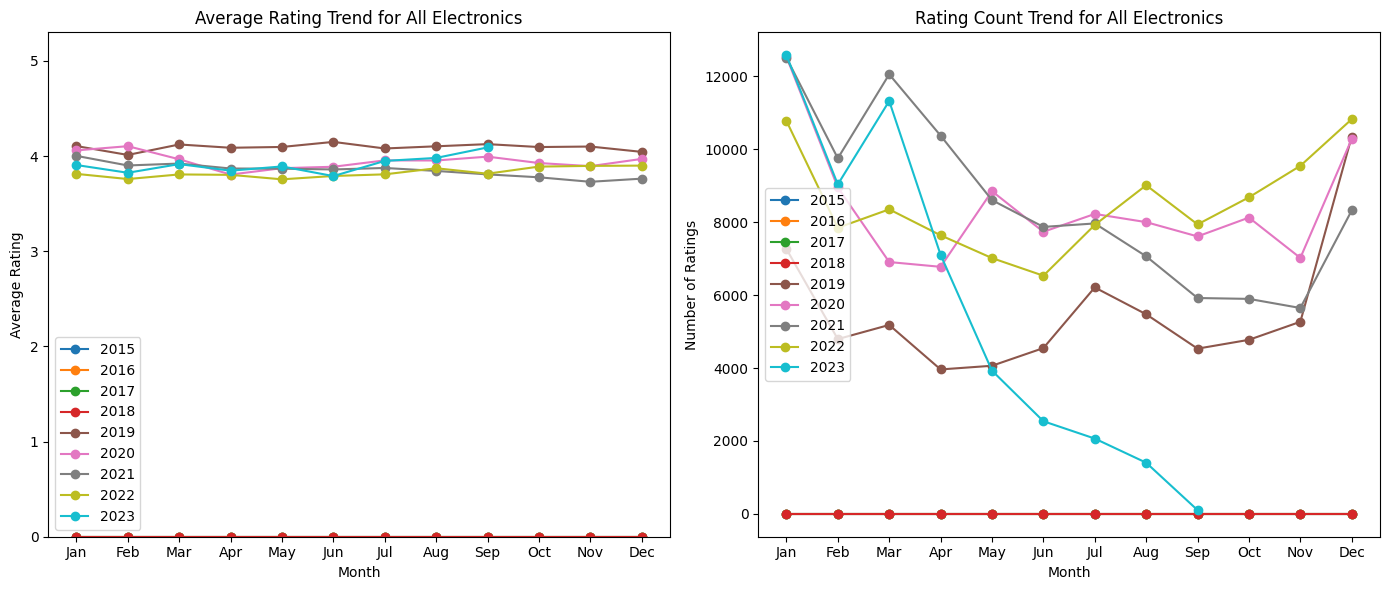

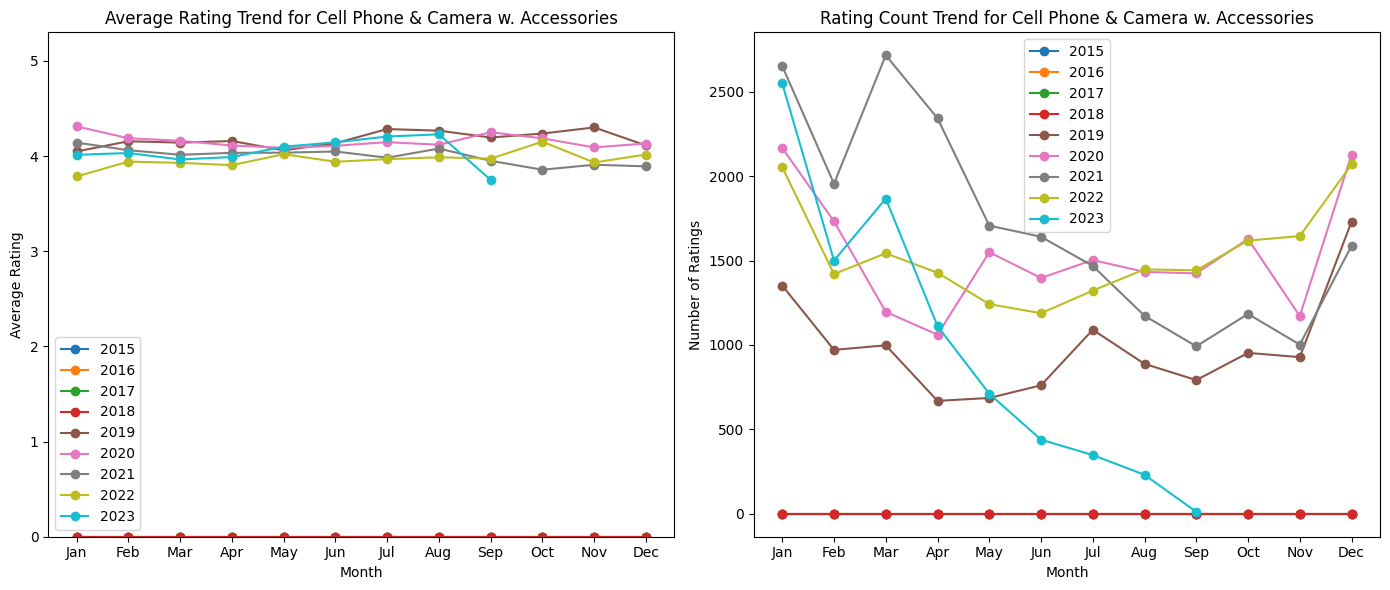

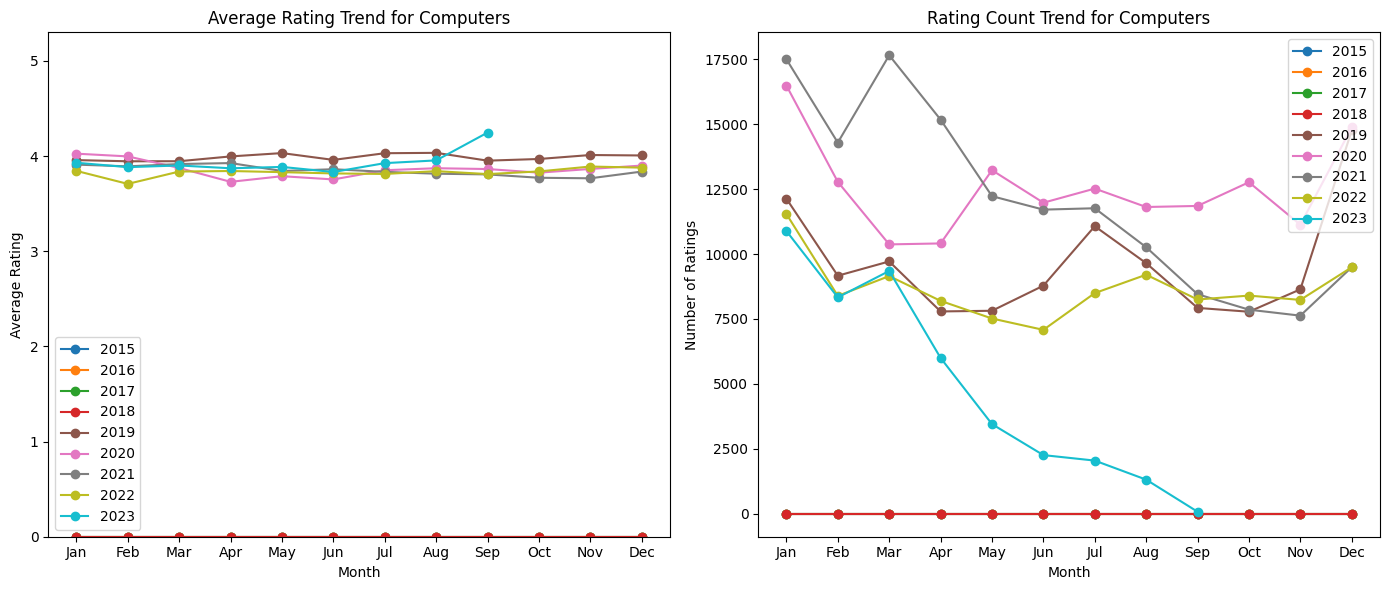

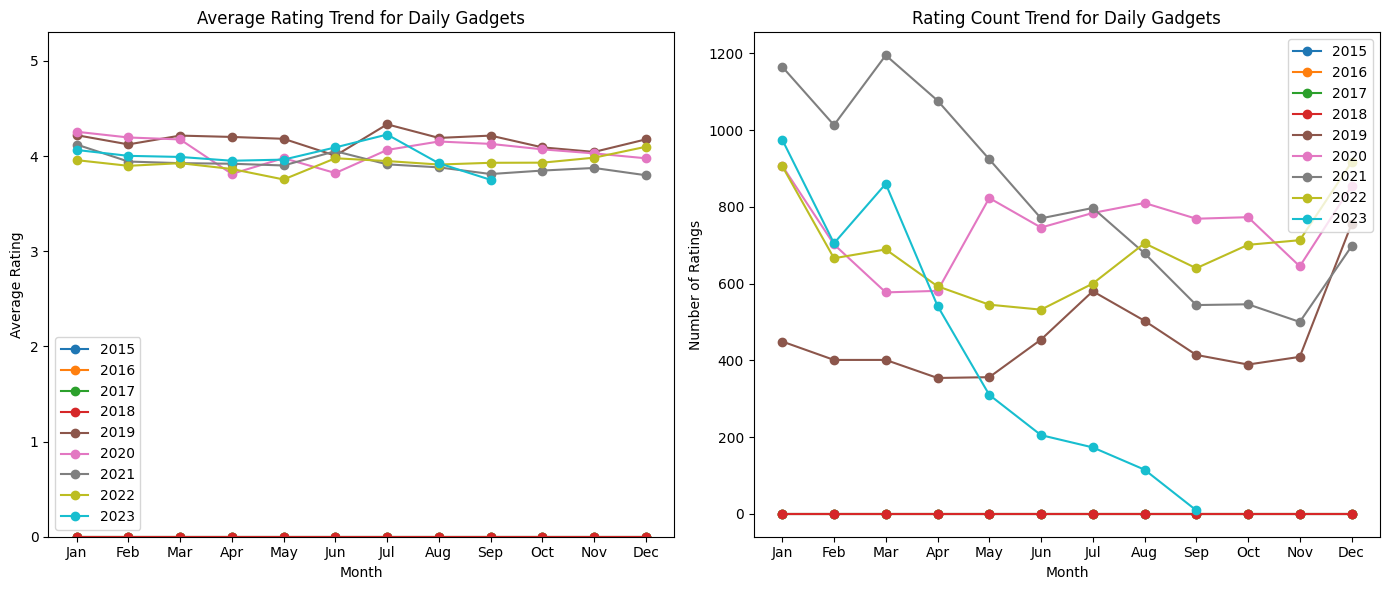

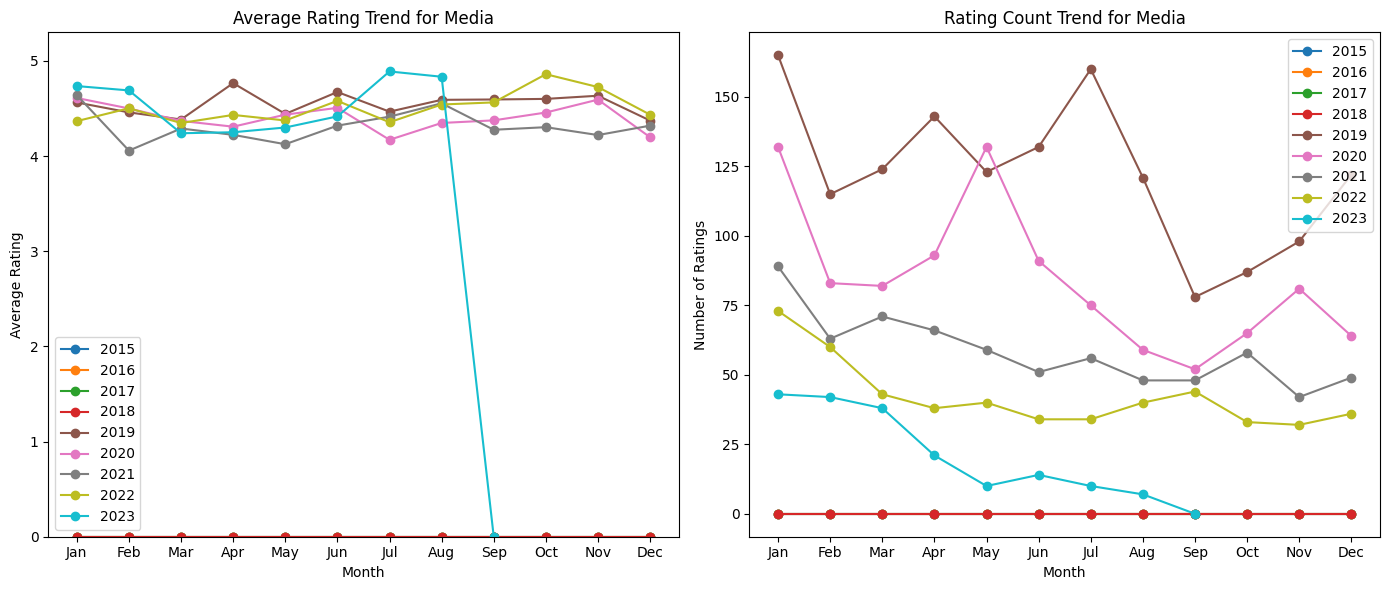

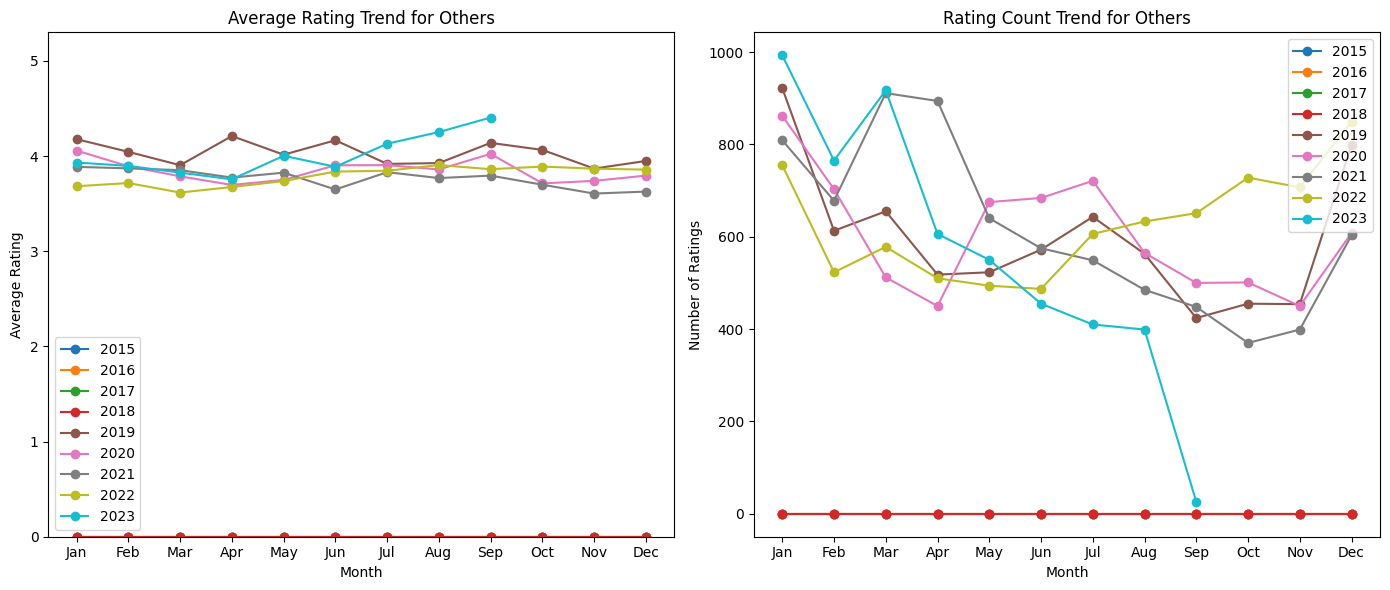

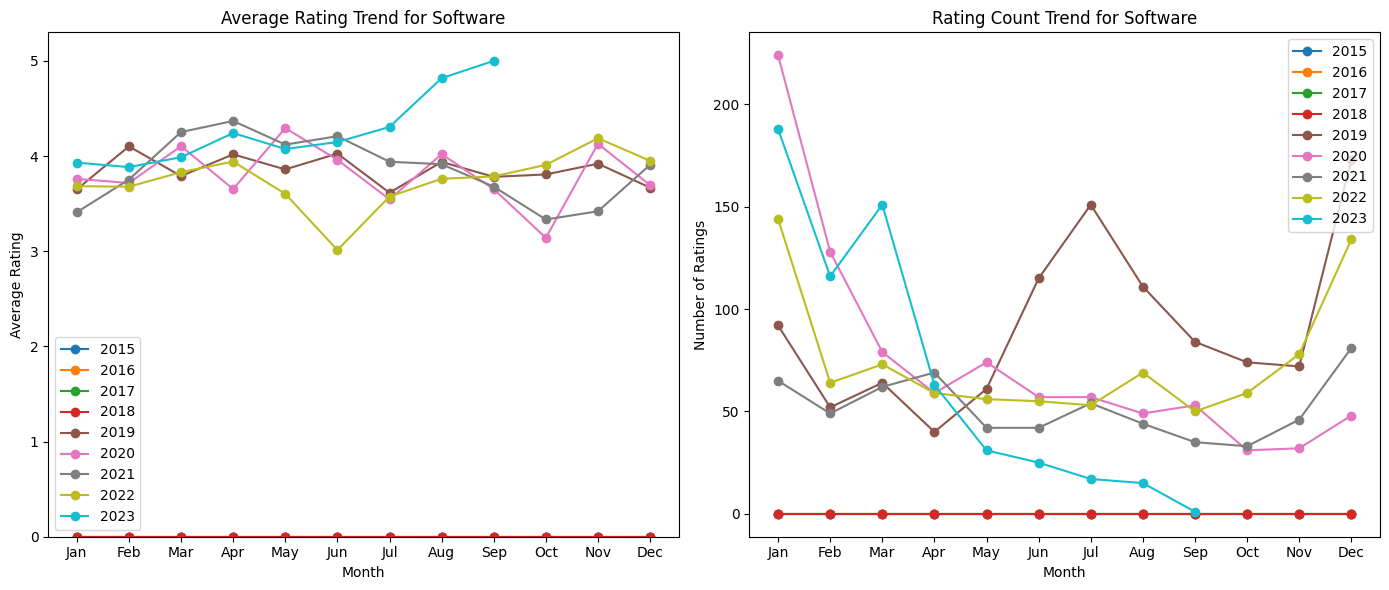

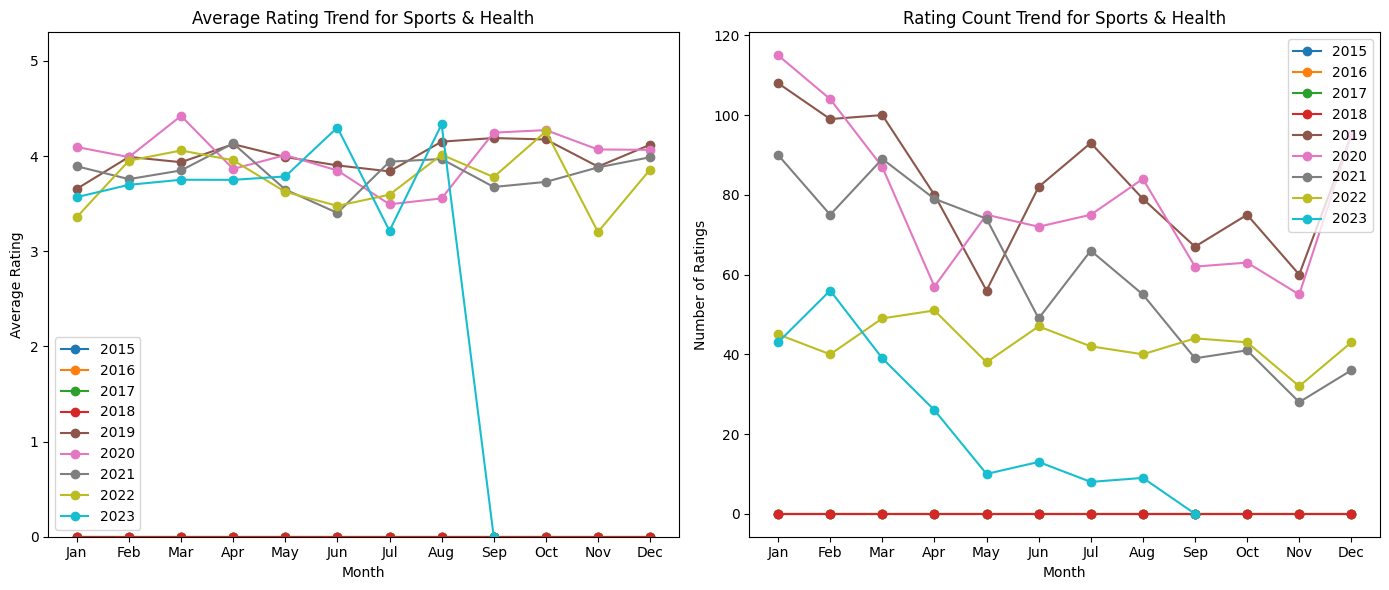

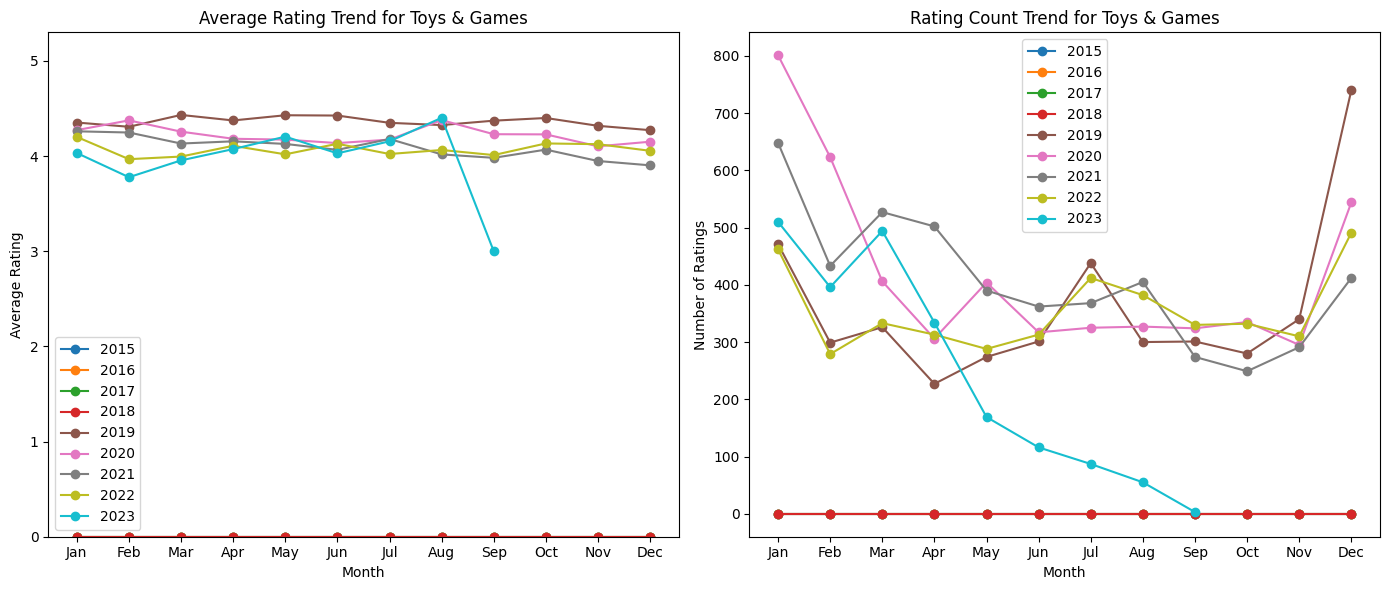

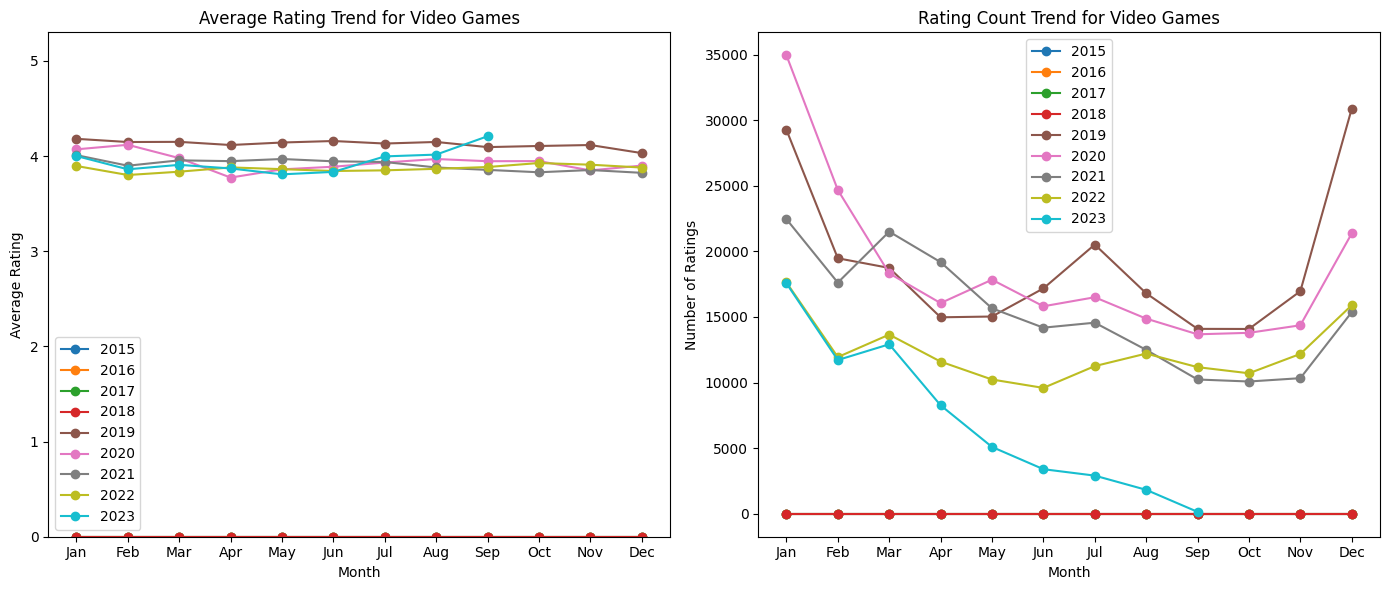

In [56]:
# Define the year range dynamically (e.g., from 2020 to 2023)
start_year = 2015
end_year = 2023
year_range = range(start_year, end_year + 1)

# Iterate through each main_category and generate individual plots
for category in unique_categories:
    category_data = agg_df[agg_df['main_category'] == category]

    # Create a DataFrame with all months
    all_months_df = pd.DataFrame({
        'month': month_names
    })
    
    # Initialize an empty DataFrame to store merged data for the years
    category_data_merged = pd.DataFrame()

    for year in year_range:
        # Filter category data for the current year
        category_data_year = category_data[category_data['year'] == year]
        
        # Merge the actual data with the all_months_df, ensuring all months are represented
        category_data_year_merged = pd.merge(all_months_df, category_data_year, on='month', how='left', suffixes=('', '_actual'))
        
        # Fill missing values (NaN) with 0 for 'average_rating' and 'rating_count'
        category_data_year_merged['average_rating'] = category_data_year_merged['average_rating'].fillna(0)
        category_data_year_merged['rating_count'] = category_data_year_merged['rating_count'].fillna(0)
        
        # Fill missing values for 'year' and 'main_category'
        category_data_year_merged['year'] = category_data_year_merged['year'].fillna(year)
        category_data_year_merged['main_category'] = category_data_year_merged['main_category'].fillna(category)

        # Concatenate the data for the current year to the merged data DataFrame
        category_data_merged = pd.concat([category_data_merged, category_data_year_merged])

    # Dynamically exclude October to December for the year 2023 due to Dataset not updated to 2023 Oct onwards.
    category_data_merged = category_data_merged[~((category_data_merged['year'] == 2023) & 
                                                  (category_data_merged['month'].isin(['Oct', 'Nov', 'Dec'])))]

    # Create a new figure for each category
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Update the colormap retrieval to use plt.get_cmap
    year_colors = {year: plt.get_cmap('tab10', len(year_range))(i) for i, year in enumerate(year_range)}


    # Left subplot: Plot average rating (line plot)
    ax1 = axes[0]
    for year in year_range:
        year_data = category_data_merged[category_data_merged['year'] == year]
        ax1.plot(year_data['month'], year_data['average_rating'], 
                 label=f'{year}', color=year_colors[year], marker='o')

    ax1.set_title(f'Average Rating Trend for {category}')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average Rating')

    ax1.legend()
    ax1.set_ylim(0, 5.3)  # Set y-axis limits to 0-5 for all graphs

    # Right subplot: Plot rating count (line plot)
    ax2 = axes[1]
    for year in year_range:
        year_data = category_data_merged[category_data_merged['year'] == year]
        ax2.plot(year_data['month'], year_data['rating_count'], 
                 label=f'{year}', color=year_colors[year], marker='o')

    ax2.set_title(f'Rating Count Trend for {category}')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Number of Ratings')

    ax2.legend()

    # Adjust layout to avoid overlapping subplots
    plt.tight_layout()

    # Show the plot
    plt.show()


### Saving the Dataset for Visualisation

In [51]:
# Initialize an empty DataFrame to hold merged data for all categories
all_categories_data_merged = pd.DataFrame()

# Iterate through each main_category and generate the data
for category in unique_categories:
    category_data = agg_df[agg_df['main_category'] == category]

    # Create a DataFrame with all months
    all_months_df = pd.DataFrame({
        'month': month_names
    })
    
    # Initialize an empty DataFrame to store merged data for the years
    category_data_merged = pd.DataFrame()

    for year in year_range:
        # Filter category data for the current year
        category_data_year = category_data[category_data['year'] == year]
        
        # Merge the actual data with the all_months_df, ensuring all months are represented
        category_data_year_merged = pd.merge(all_months_df, category_data_year, on='month', how='left', suffixes=('', '_actual'))
        
        # Fill missing values (NaN) with 0 for 'average_rating' and 'rating_count'
        category_data_year_merged['average_rating'] = category_data_year_merged['average_rating'].fillna(0)
        category_data_year_merged['rating_count'] = category_data_year_merged['rating_count'].fillna(0)
        
        # Fill missing values for 'year' and 'main_category'
        category_data_year_merged['year'] = category_data_year_merged['year'].fillna(year)
        category_data_year_merged['main_category'] = category_data_year_merged['main_category'].fillna(category)

        # Concatenate the data for the current year to the merged data DataFrame
        category_data_merged = pd.concat([category_data_merged, category_data_year_merged])

    # Dynamically exclude October to December for the year 2023 due to Dataset not updated to 2023 Oct onwards.
    category_data_merged = category_data_merged[~((category_data_merged['year'] == 2023) & 
                                                  (category_data_merged['month'].isin(['Oct', 'Nov', 'Dec'])))]

    # Append this category's data to the overall DataFrame
    all_categories_data_merged = pd.concat([all_categories_data_merged, category_data_merged])

# Export the full merged dataset for all categories to a CSV file
all_categories_data_merged.to_csv('all_category_data_trends.csv', index=False)

print("CSV file containing all categories' data has been saved successfully!")


CSV file containing all categories' data has been saved successfully!


## Showcase of Review Anomaly

### Setting Up

In [1]:
import pandas as pd
import json
from datetime import datetime
import matplotlib.pyplot as plt

# Load the data from the text file
data = []

# with open('output_Review_Anomaly/part-r-00000', 'r') as f:
with open('output_Review_Timestamps/part-r-00000', 'r') as f:
    for line in f:
        # Split by tab and process each line
        parts = line.split('\t')
        user_id = parts[0].split(':')[1]  # Extract user_id
        review_info = json.loads(parts[1])  # Parse the JSON part
        review_count = review_info['review_count']
        timestamps = review_info['timestamps']
        
        # Convert timestamps to human-readable format
        readable_timestamps = [datetime.fromtimestamp(ts / 1000) for ts in timestamps]
        
        # Append the parsed data
        data.append([user_id, review_count, readable_timestamps])

# Create a DataFrame
df = pd.DataFrame(data, columns=['user_id', 'review_count', 'timestamps'])

print(df.head())

                        user_id  review_count  \
0  AHJRJCJMK3XVV4BSPBRAHIYEODWA           664   
1  AGMWACNMAG74AXBF7IJ22IOZSZPA           596   
2  AGIBXD3LM6HNDWWRTIOJHB5EKNFA           469   
3  AEWLQYBQDYWWUWK6UHHTNWO5AHYA           425   
4  AHEDJIDSPVYCB3GPRZKGO7YTK6XQ           346   

                                          timestamps  
0  [2006-11-27 09:37:42, 2005-02-01 02:58:12, 200...  
1  [2017-01-27 02:49:33, 2013-09-15 21:39:21, 201...  
2  [2016-09-10 19:03:58, 2016-06-01 07:26:20, 201...  
3  [2004-03-31 09:26:53, 2007-04-17 06:01:21, 200...  
4  [2012-01-12 17:36:24, 2006-07-18 05:08:56, 200...  


/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


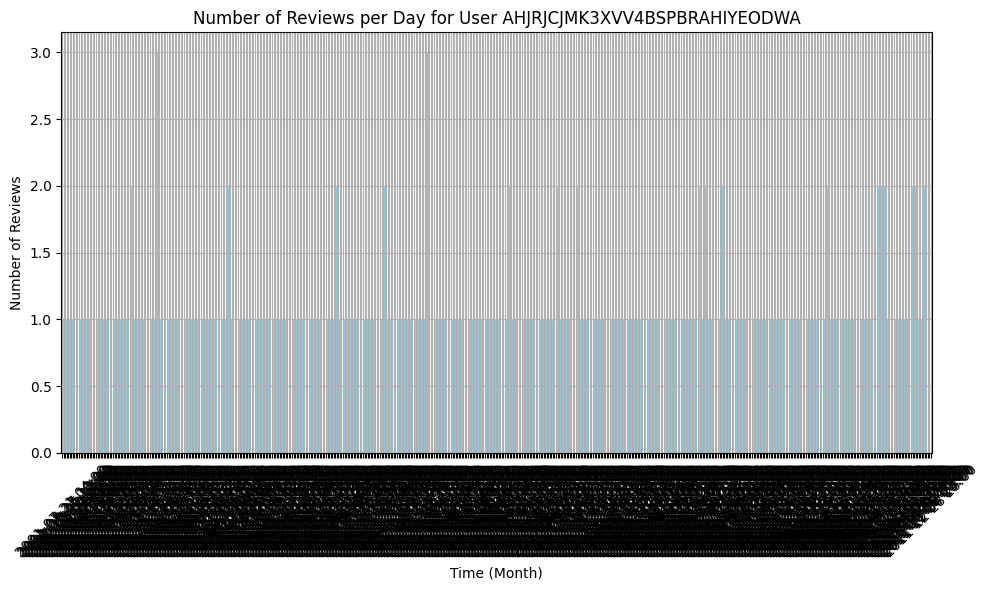

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


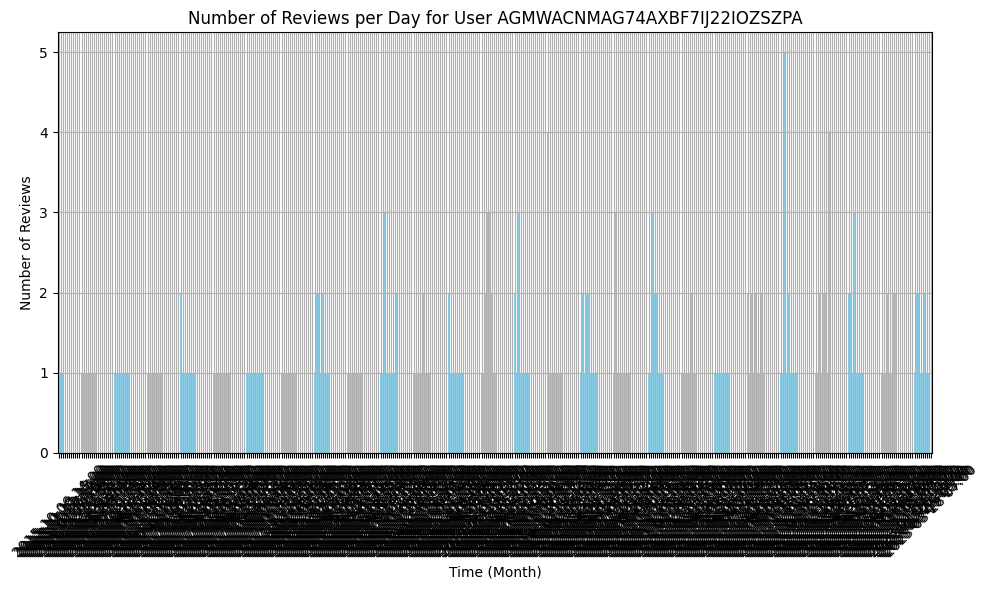

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


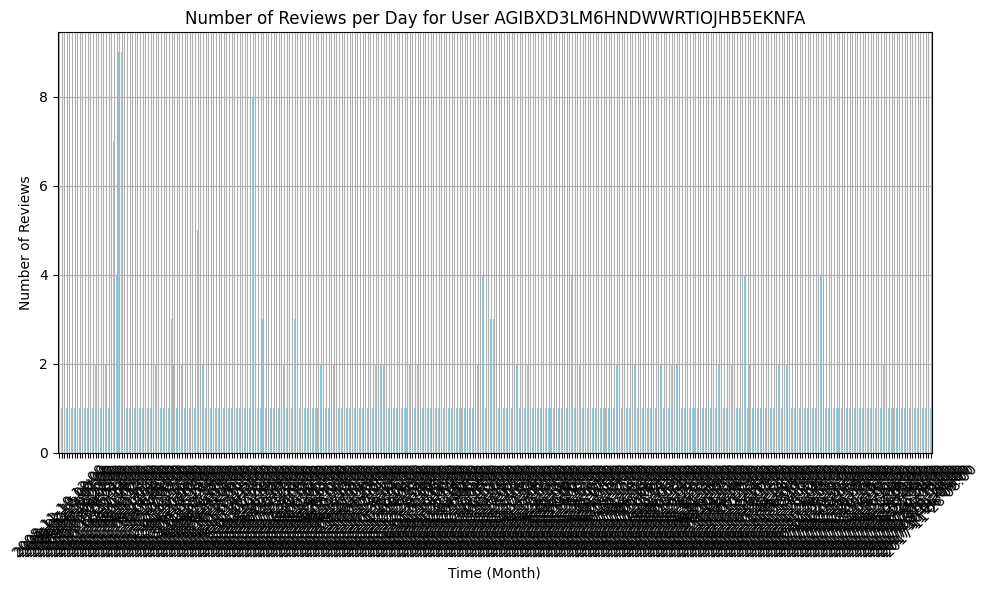

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


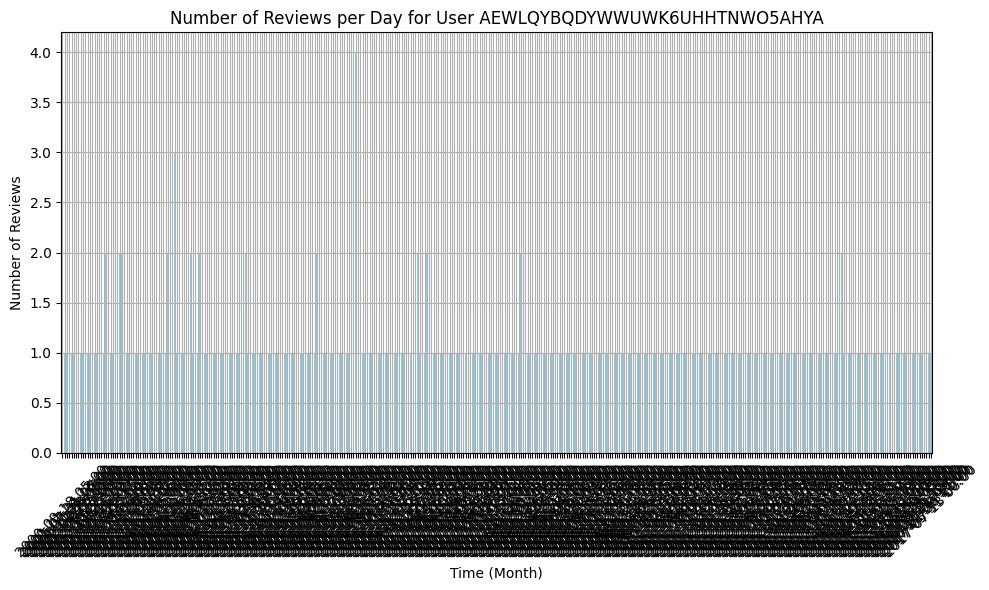

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


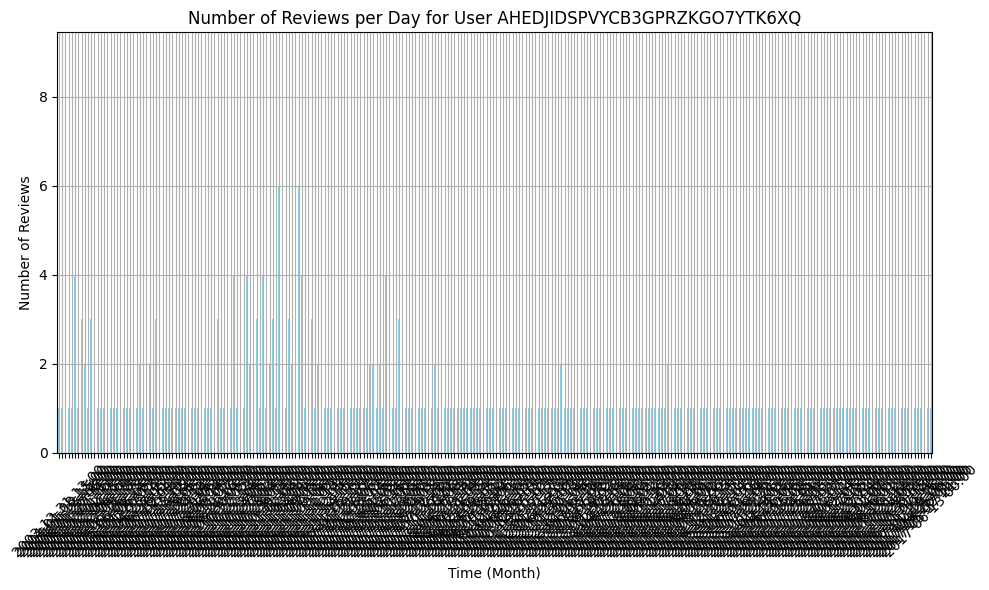

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


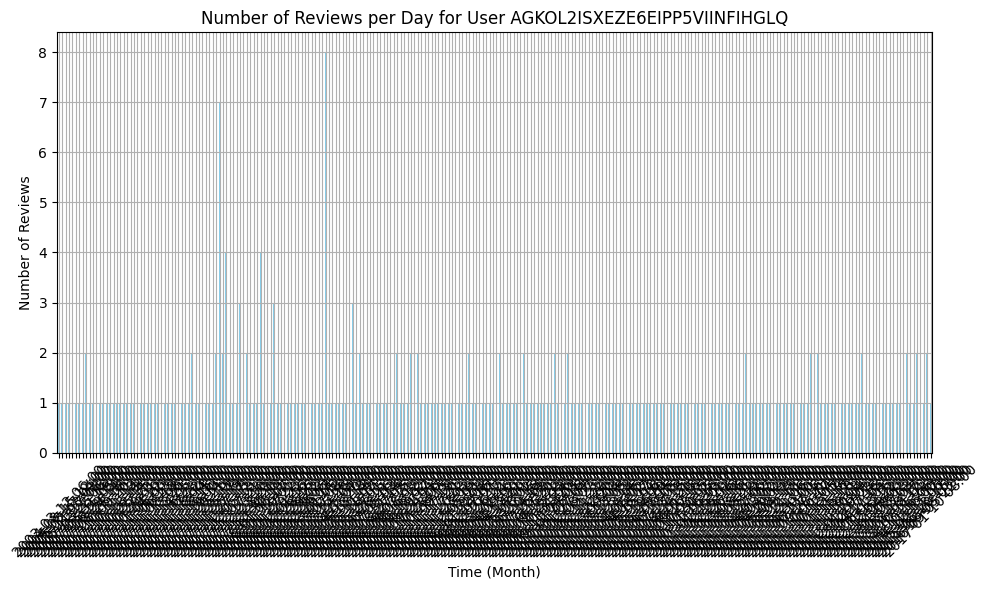

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


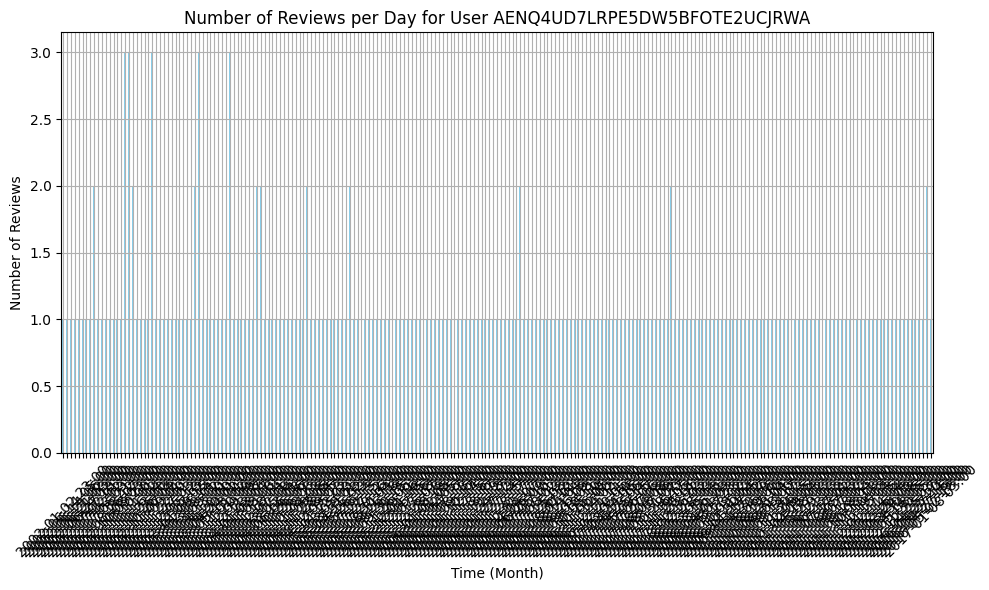

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


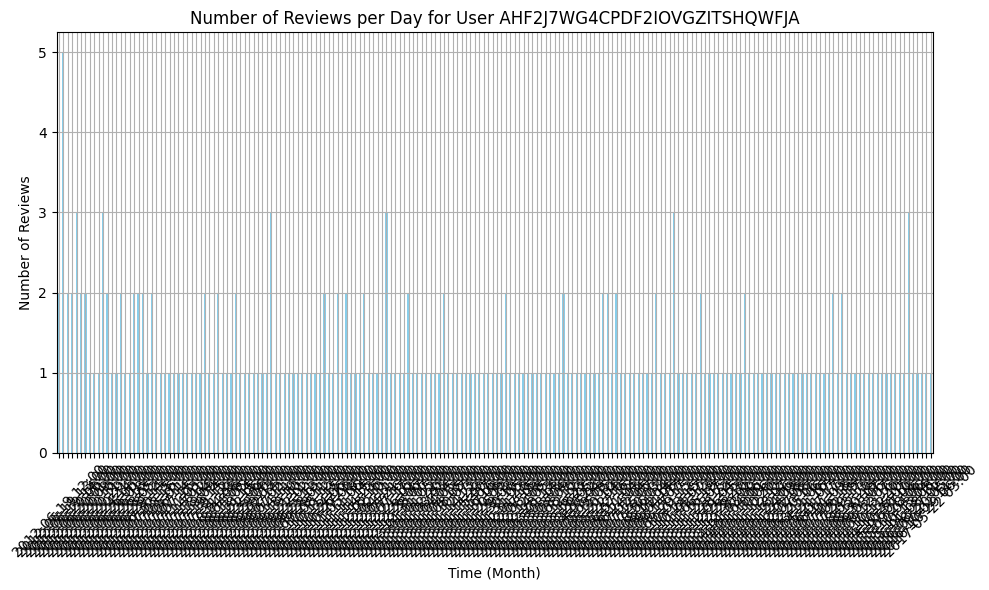

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


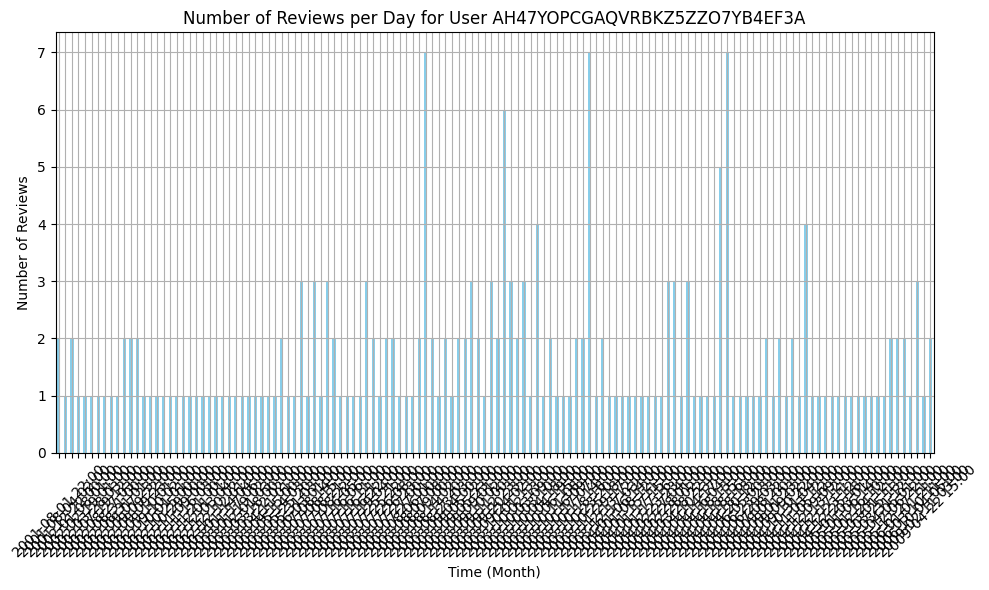

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


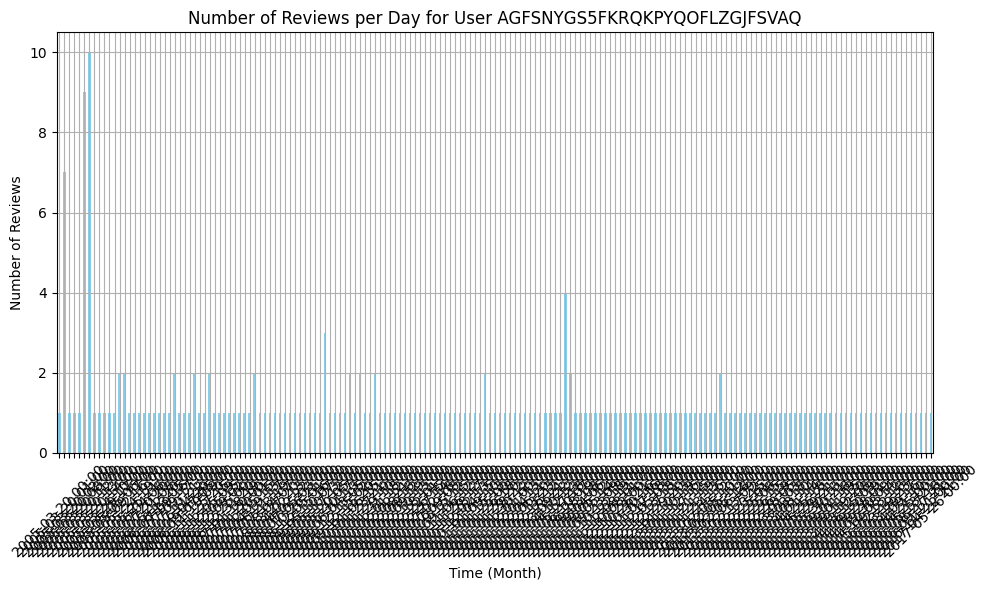

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


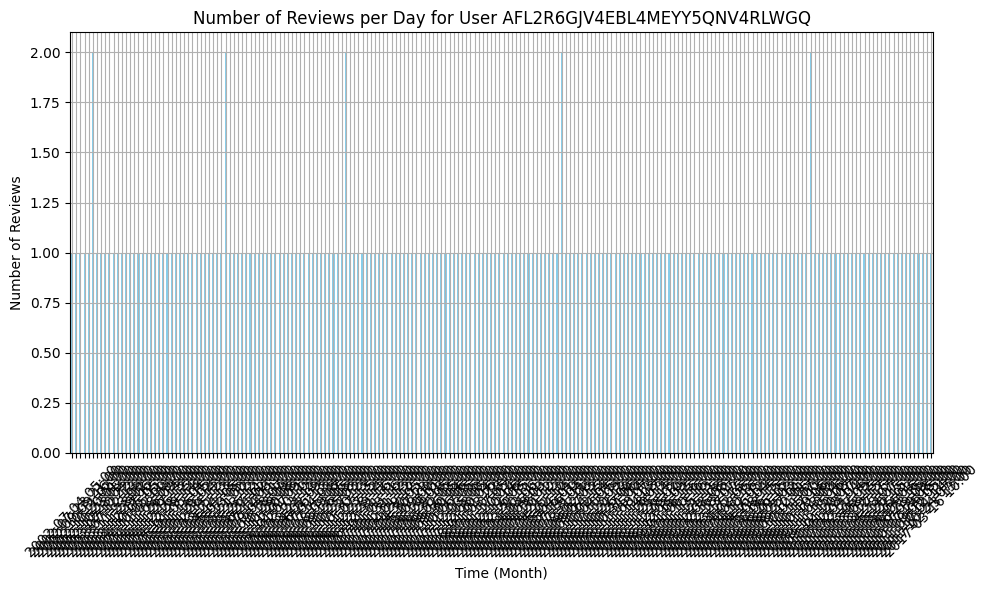

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


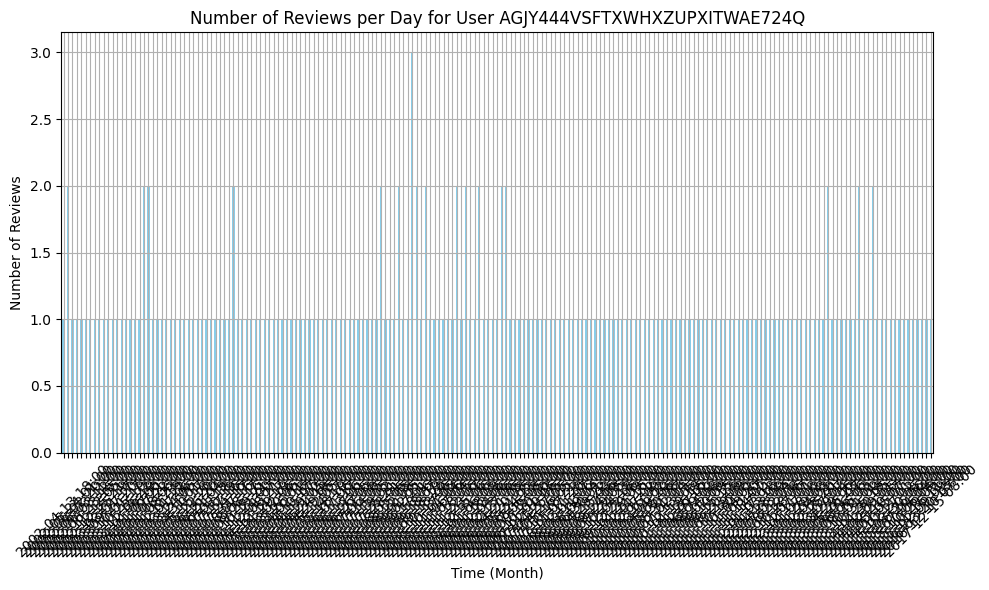

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


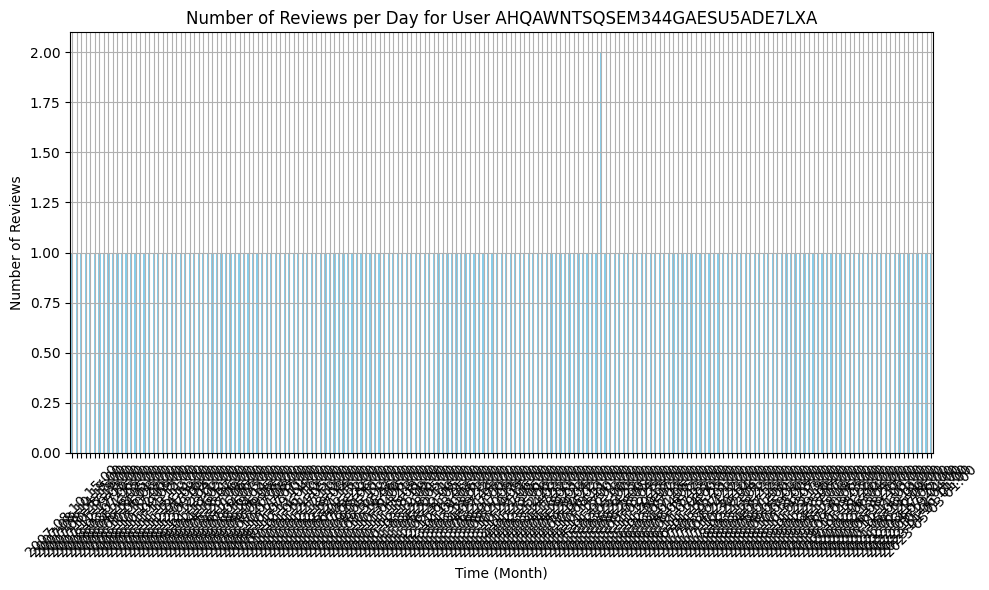

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


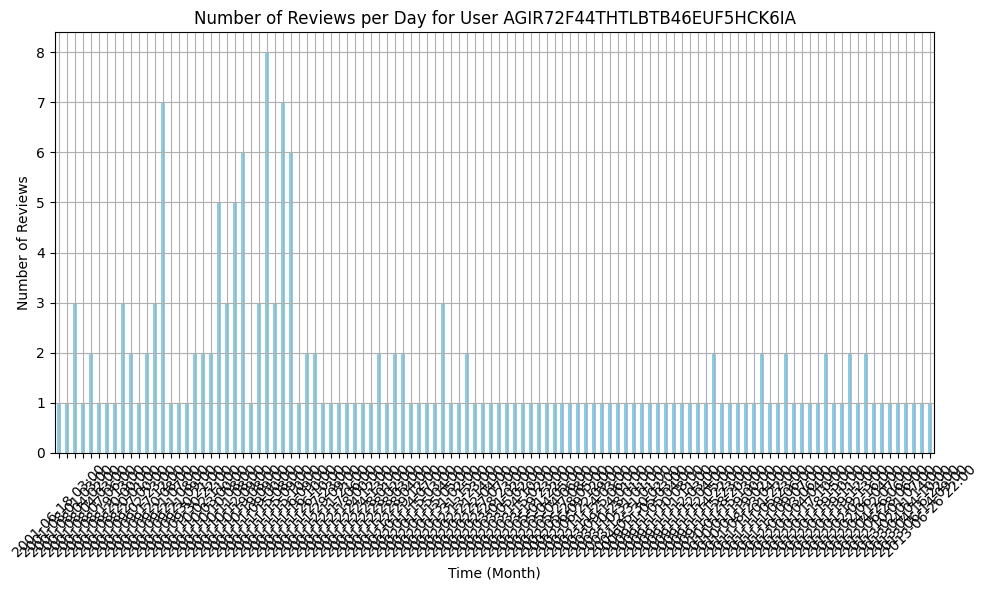

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


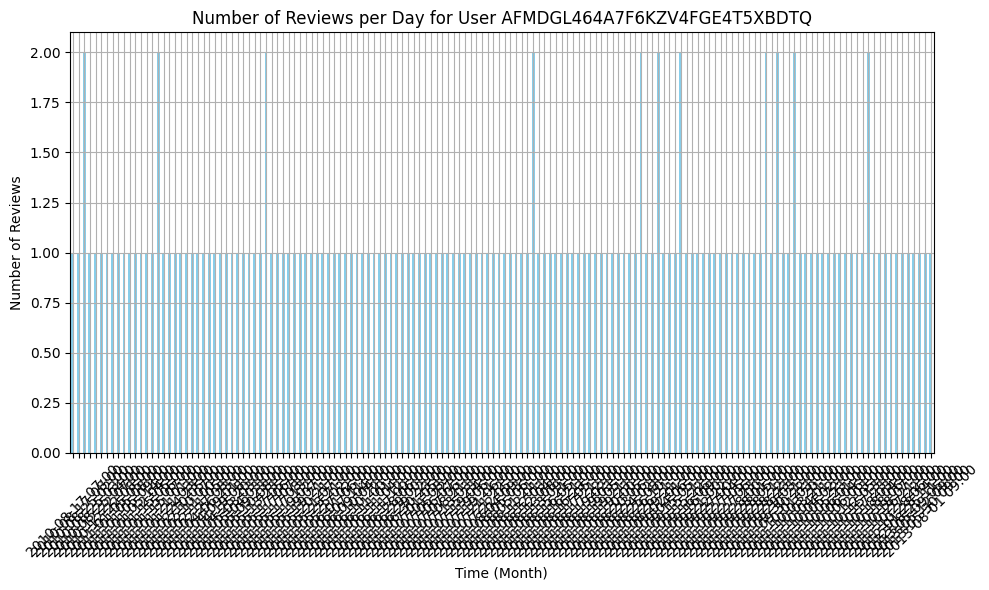

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


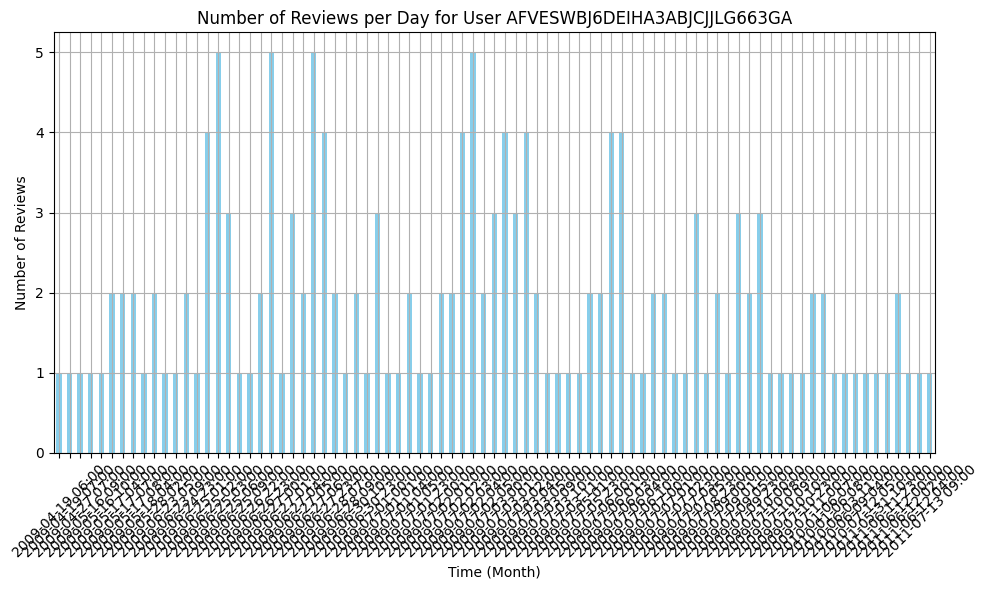

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


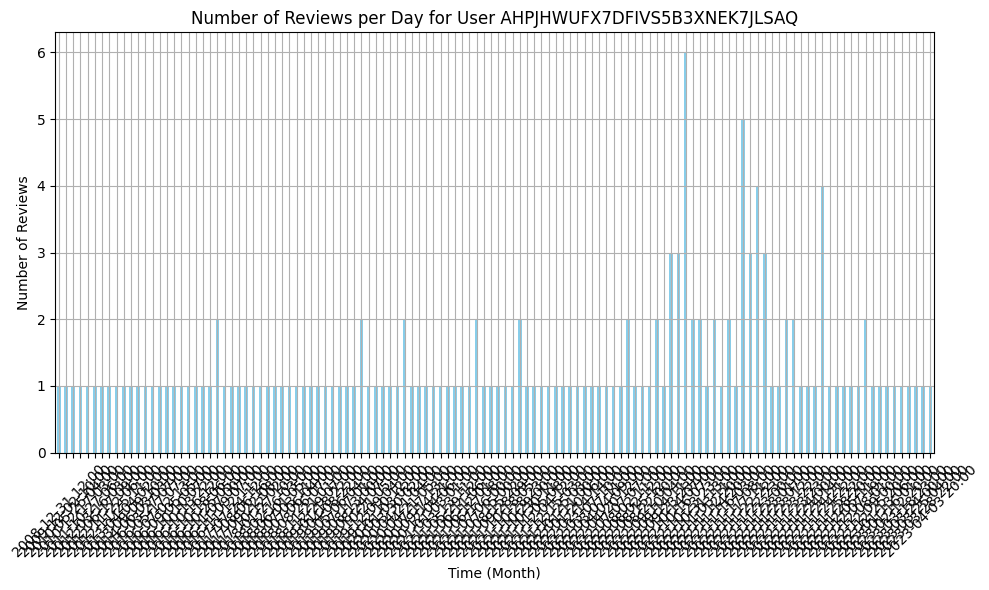

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


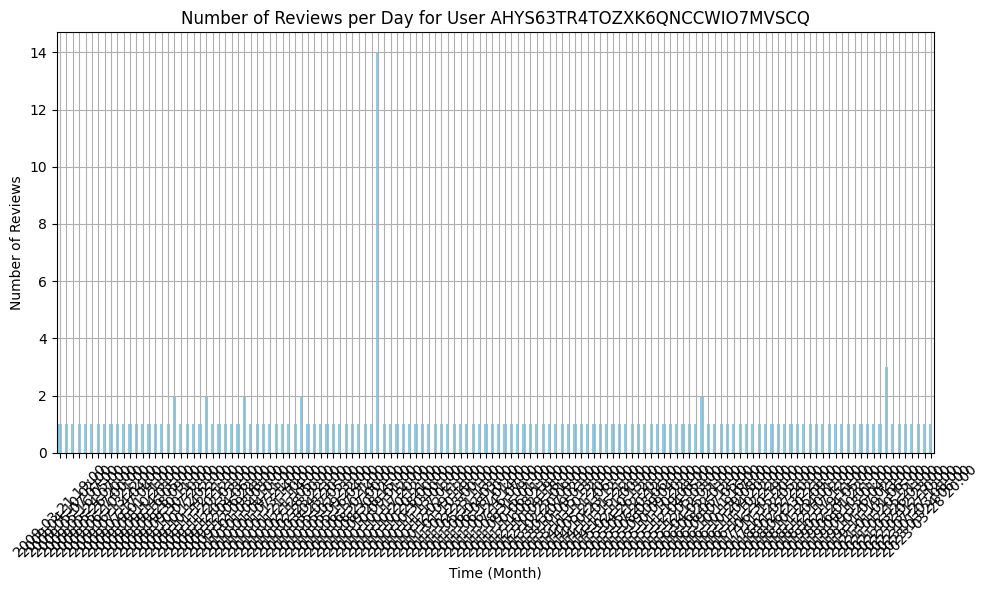

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


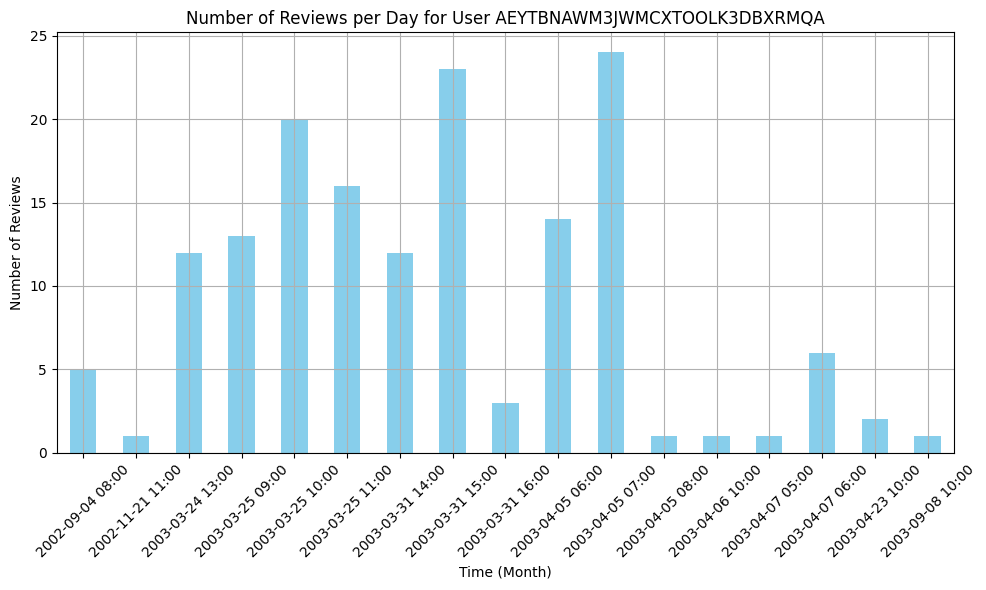

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


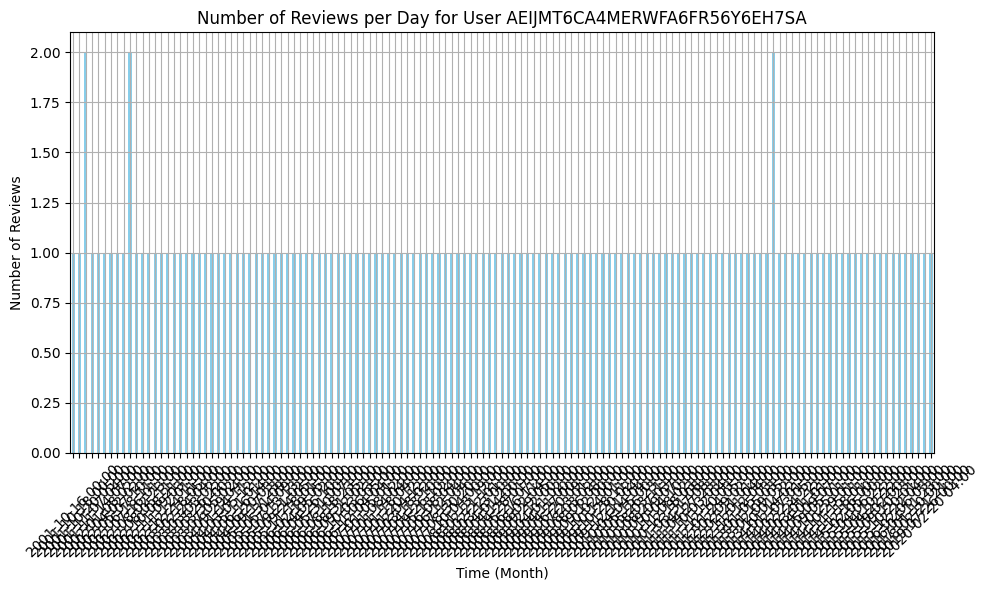

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


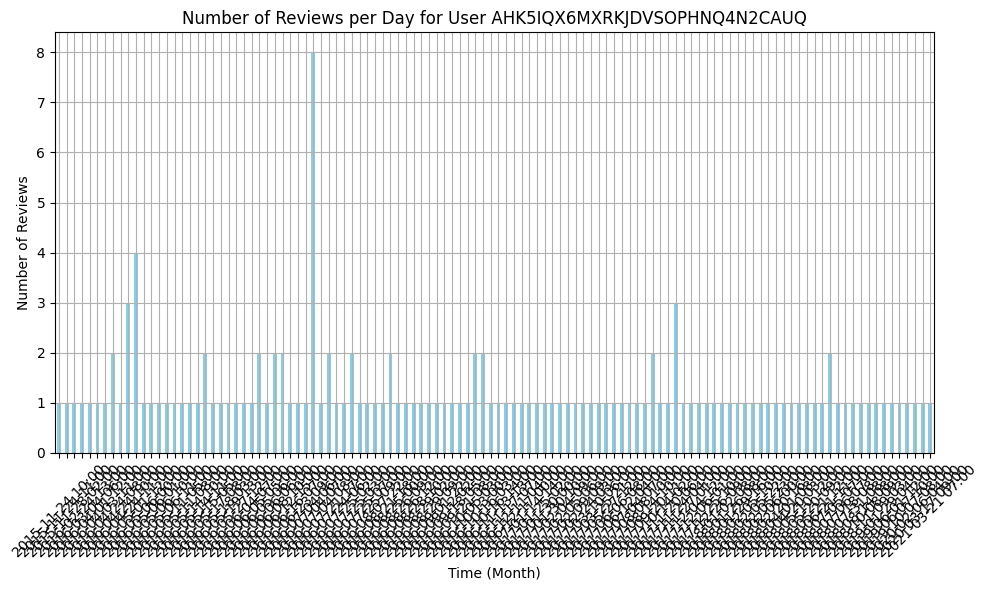

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


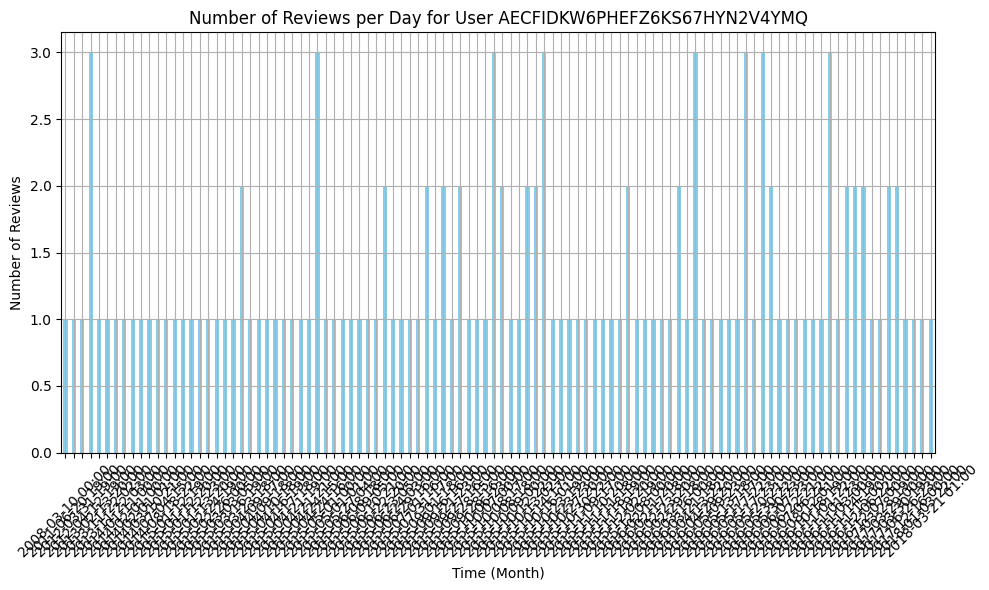

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


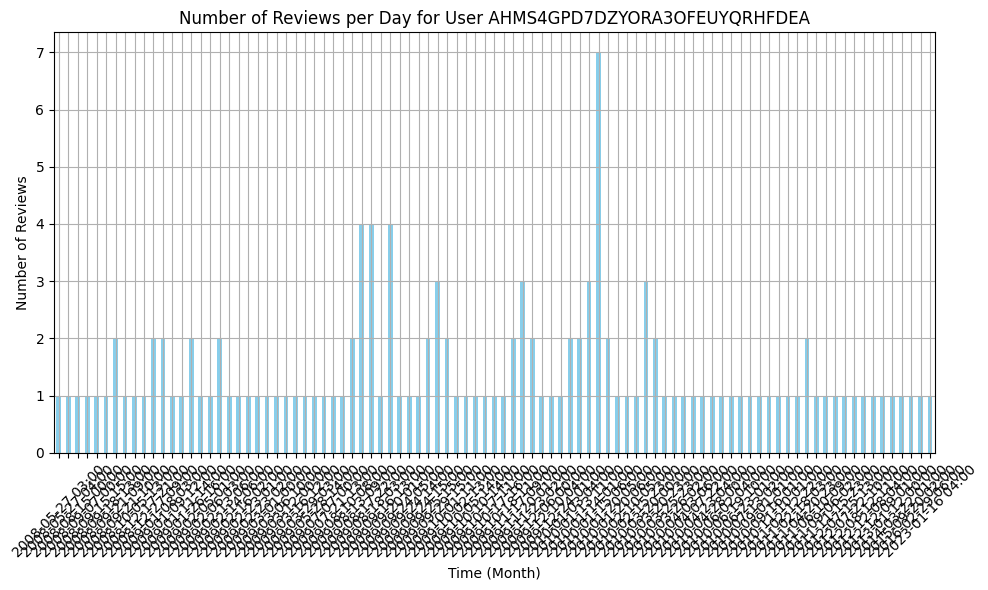

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


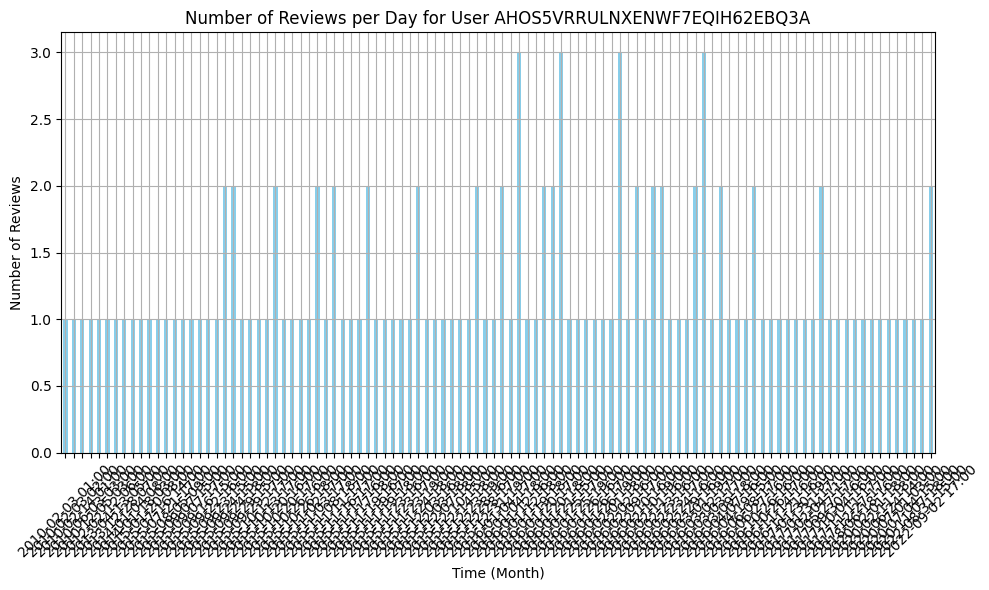

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


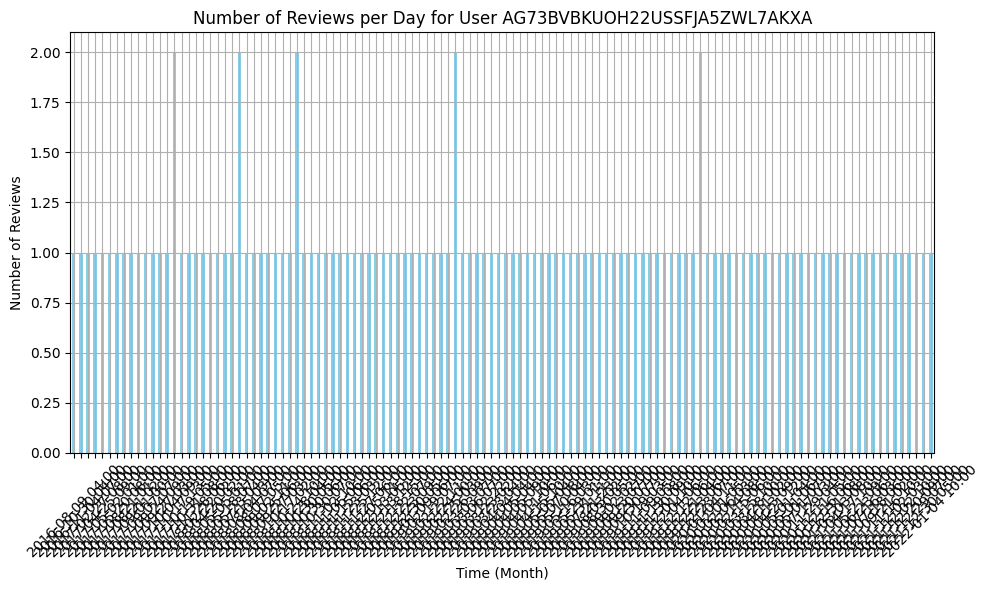

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


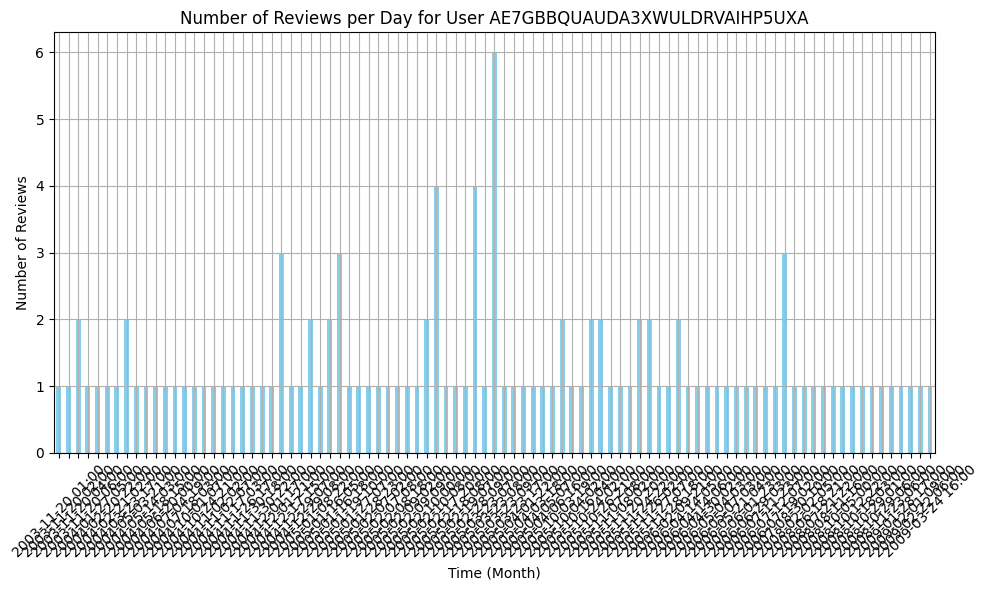

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


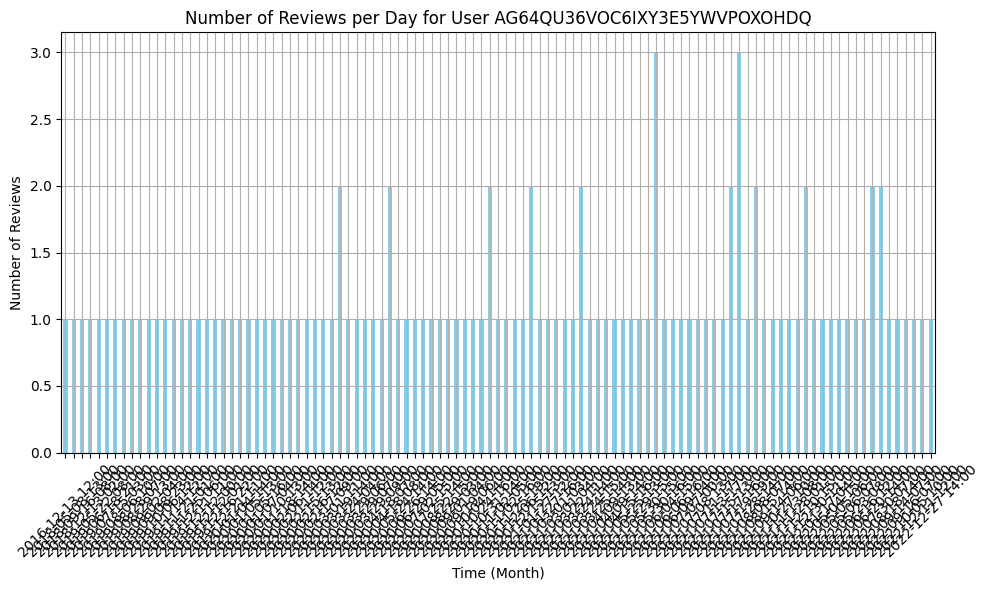

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


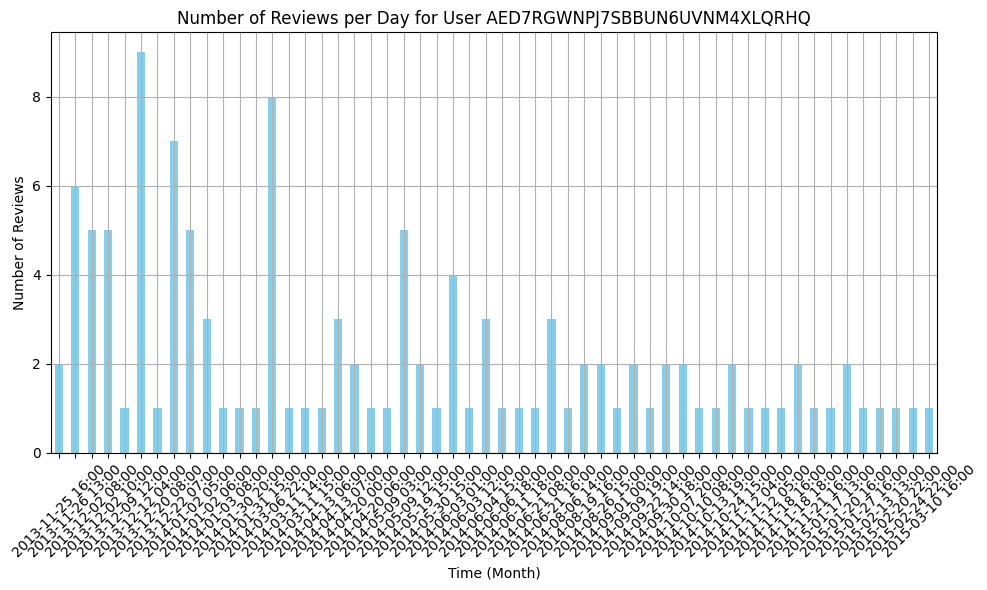

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


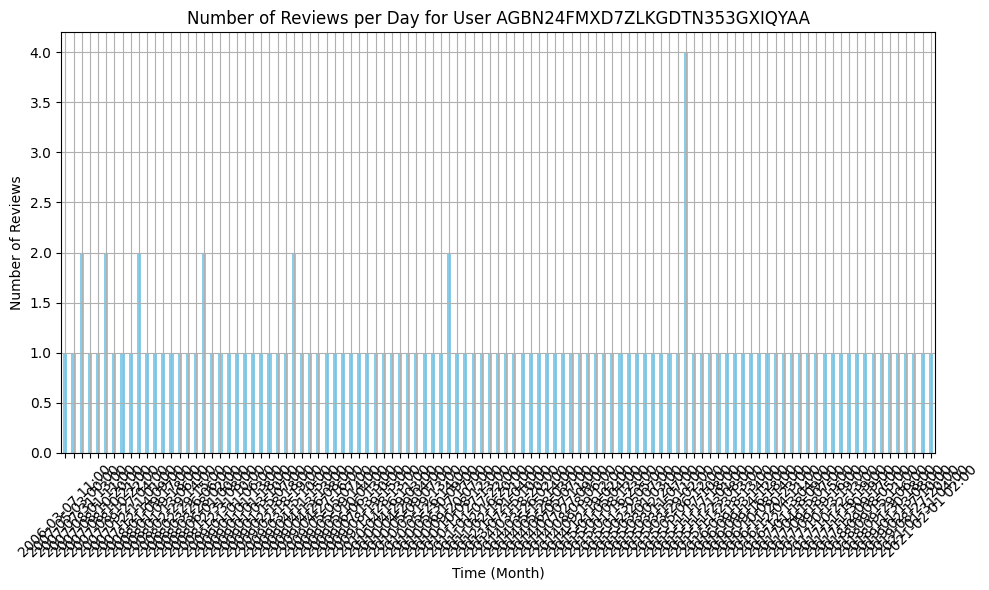

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


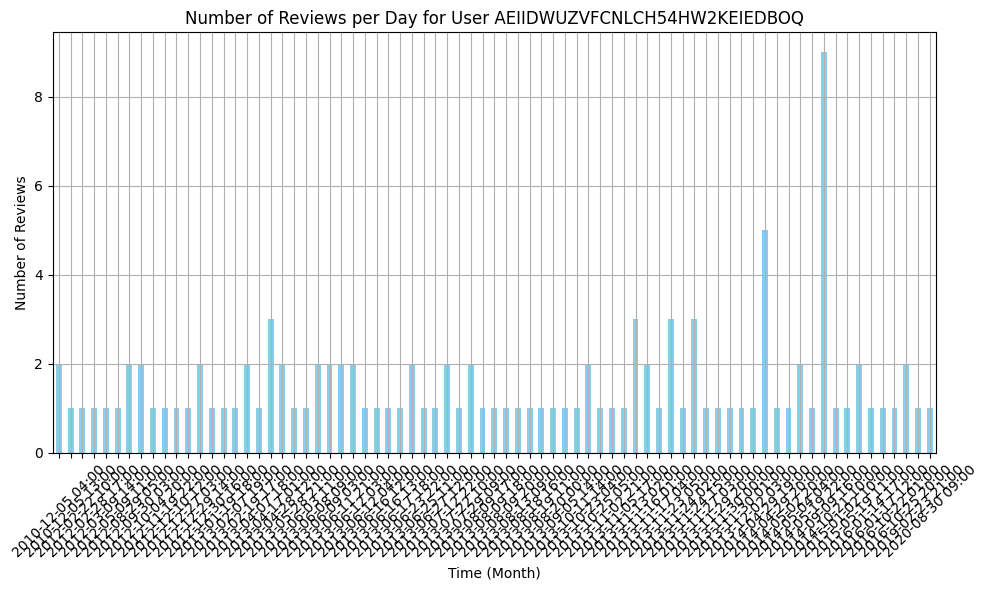

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


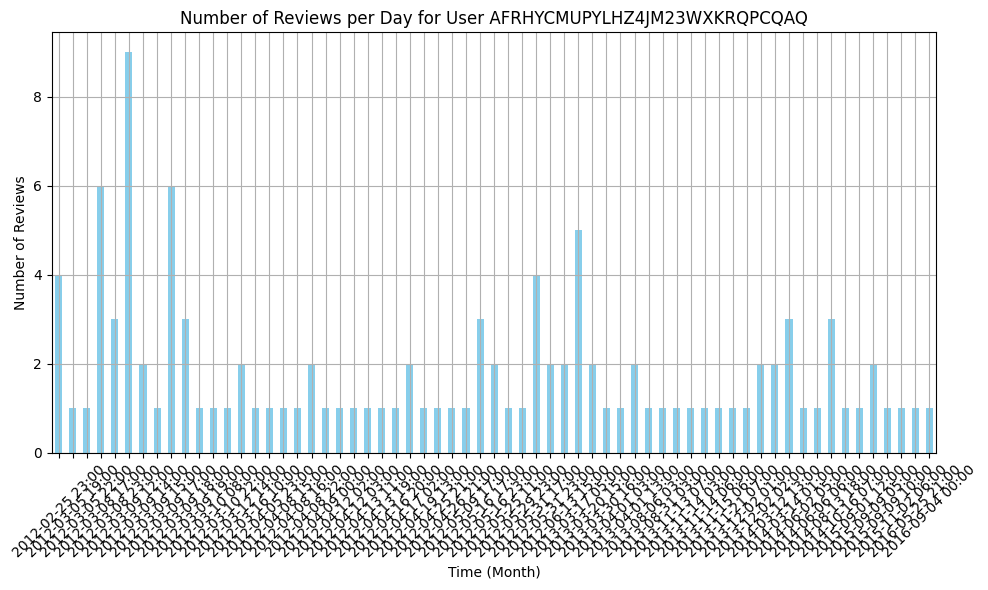

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


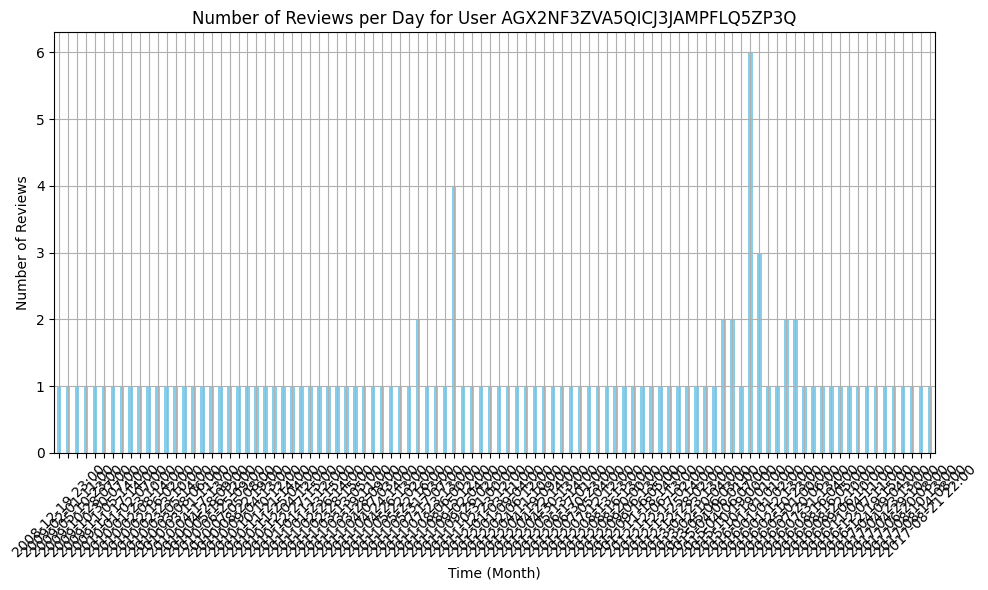

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


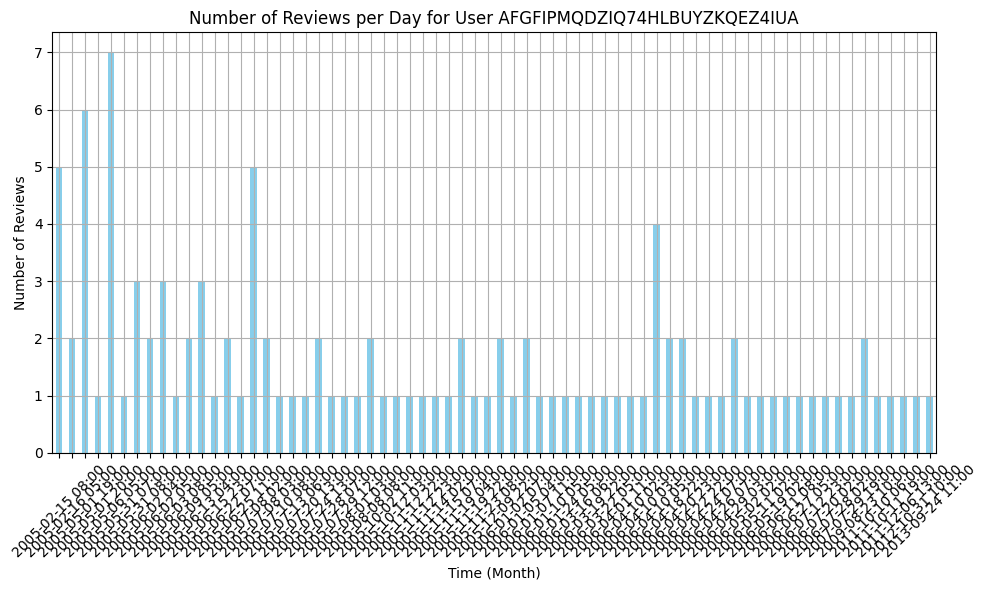

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


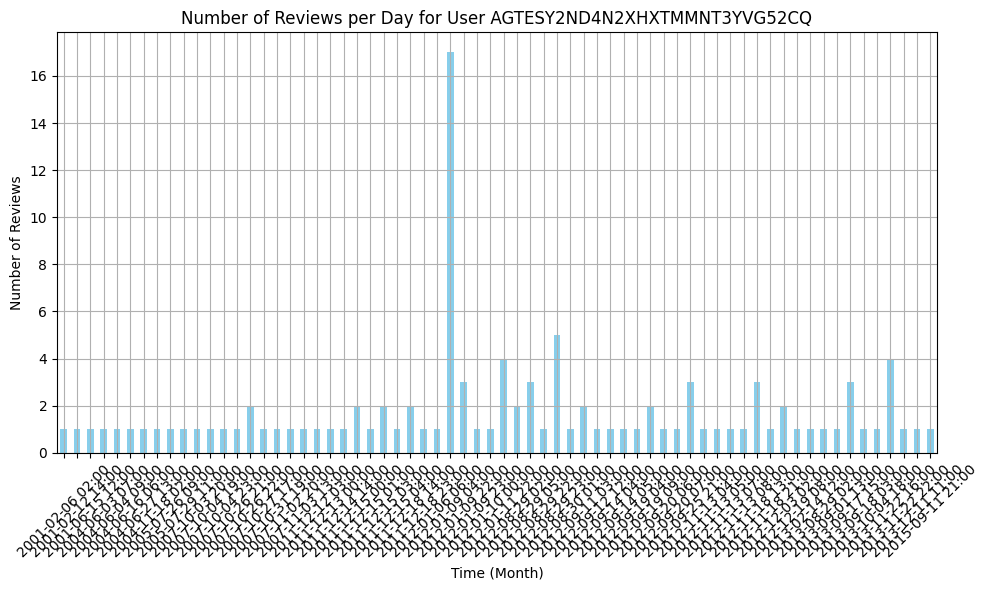

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


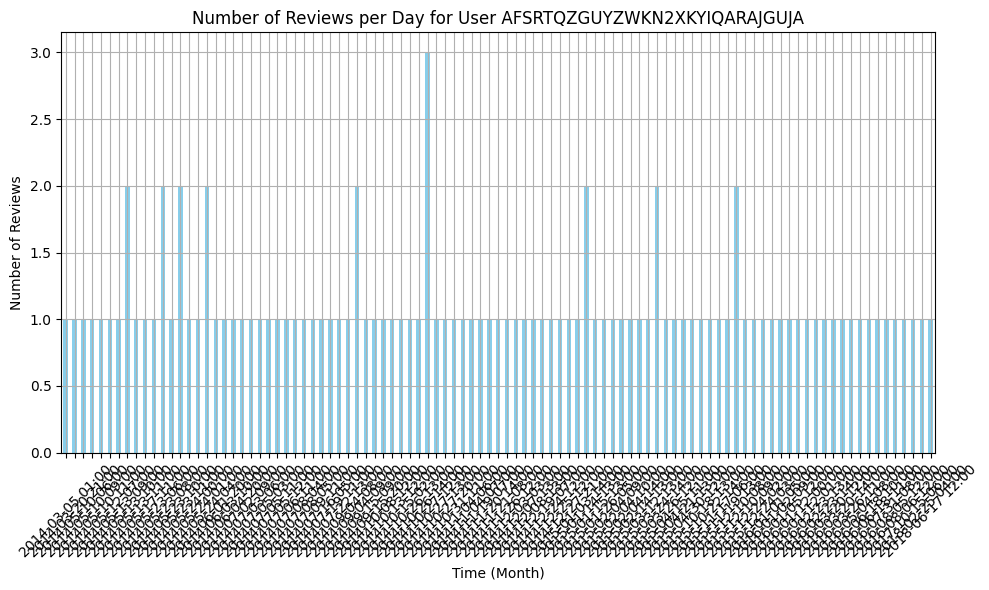

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


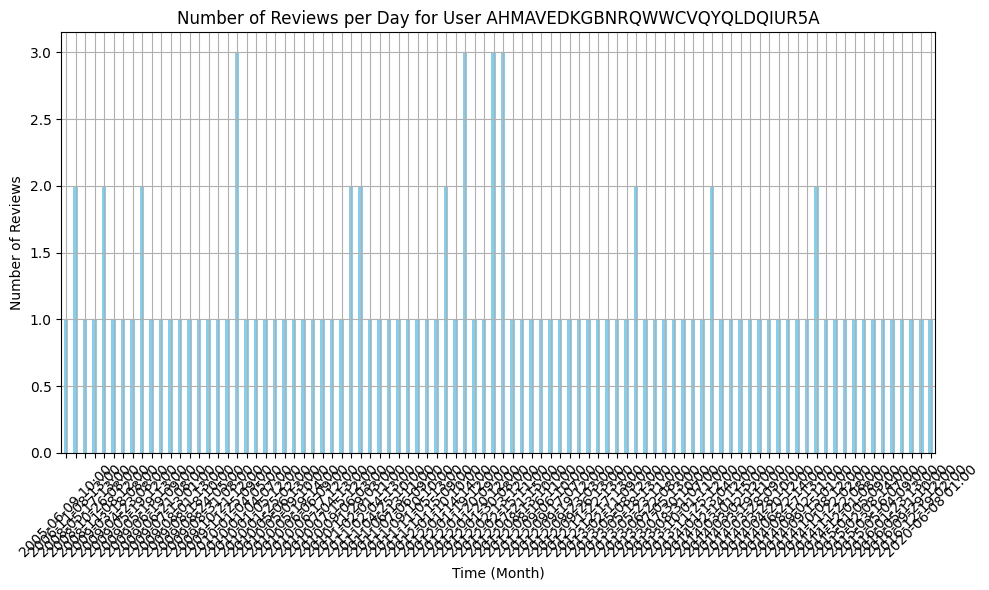

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


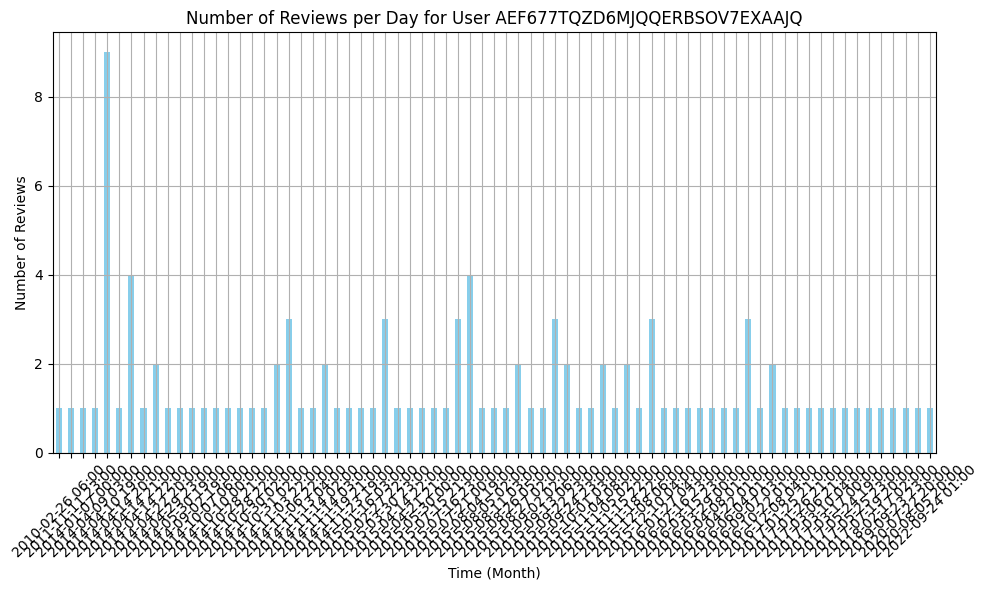

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


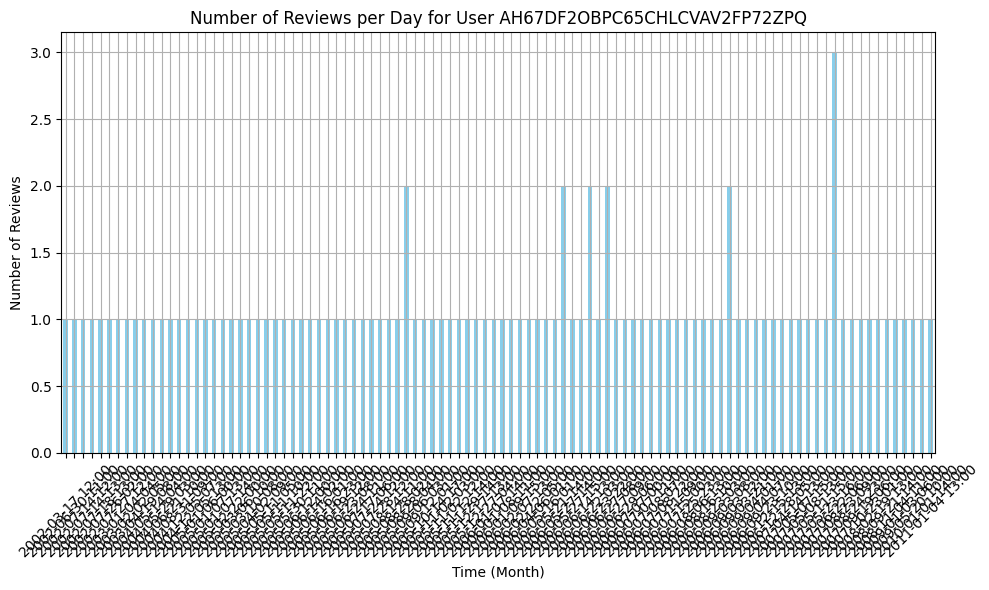

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


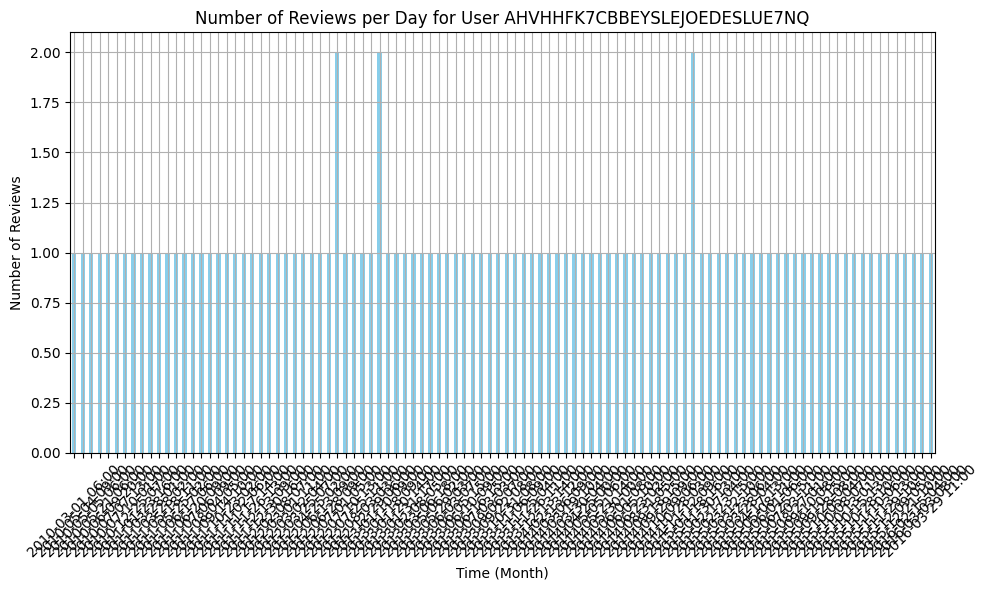

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


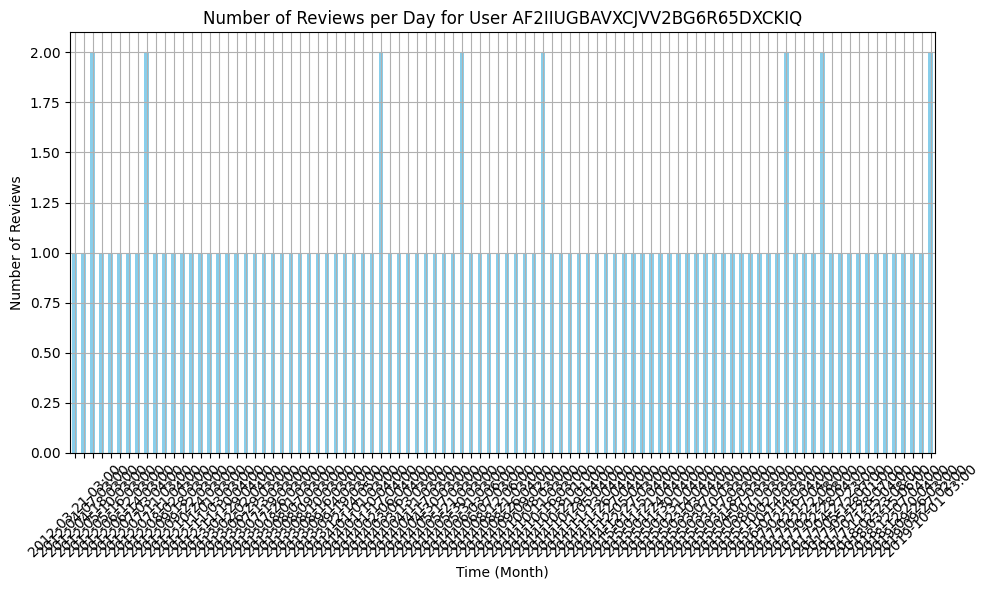

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


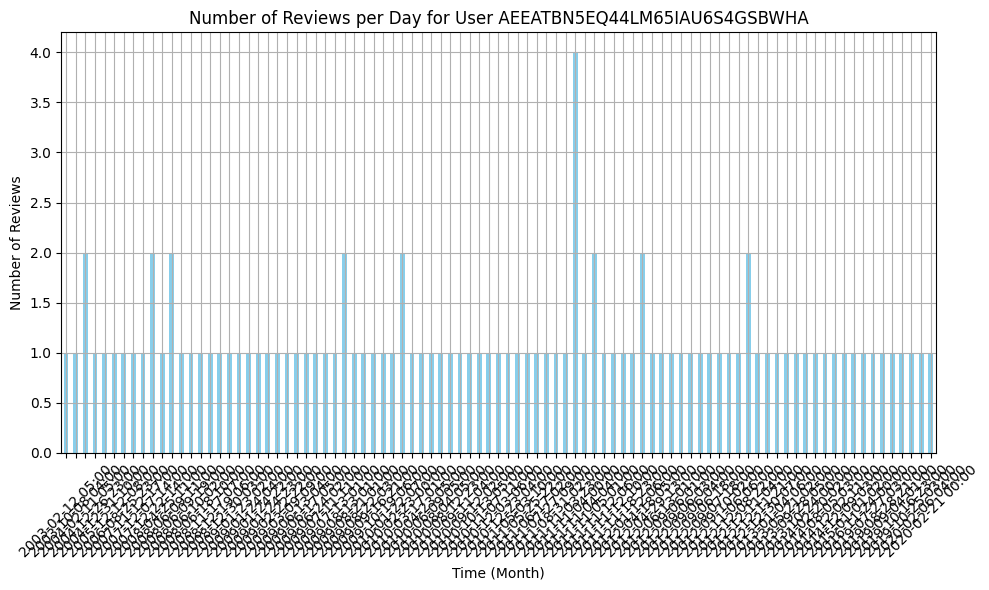

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


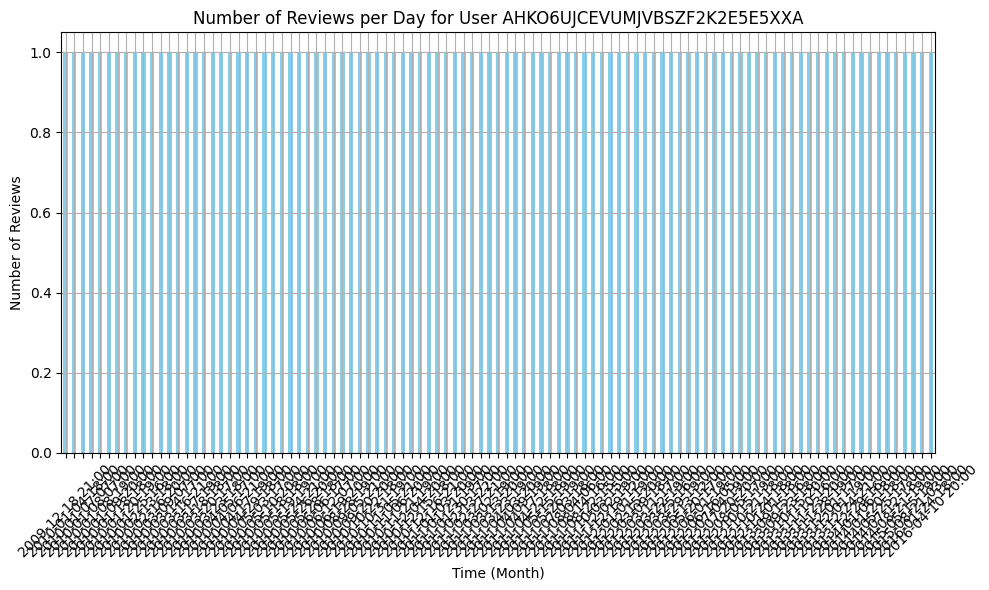

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


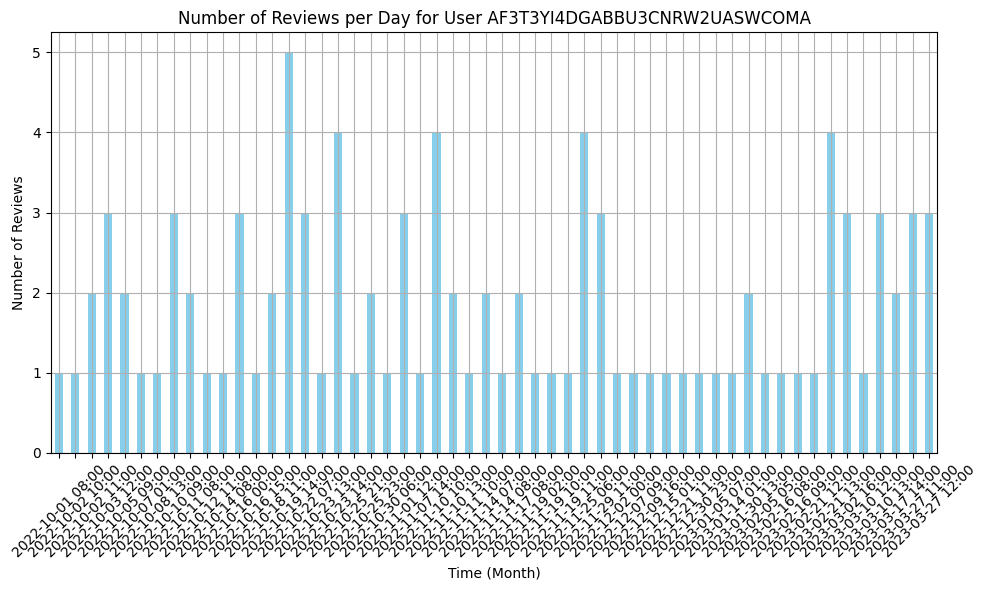

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


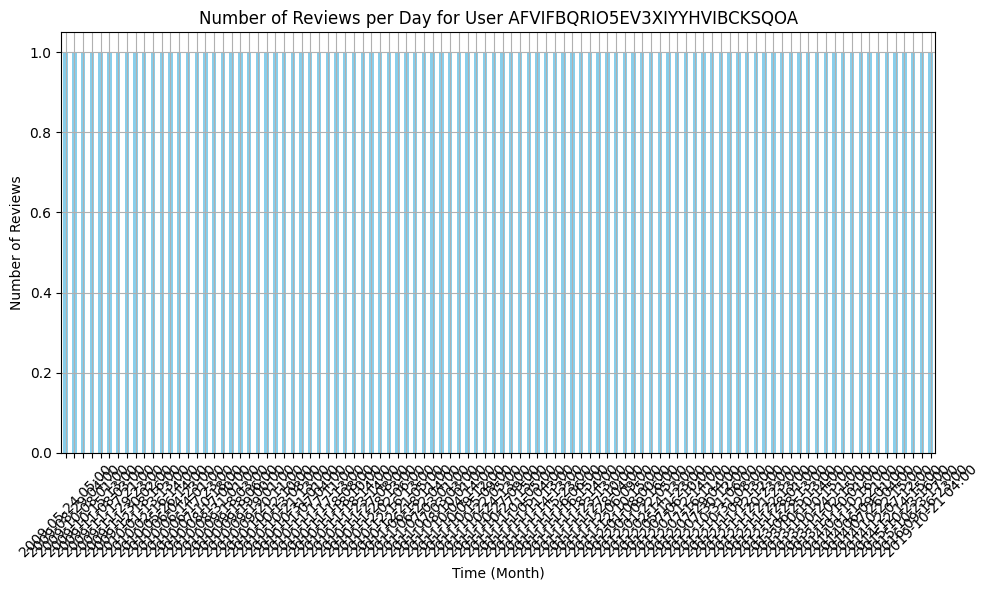

/var/folders/c7/vk9vgwps0nvb8mxt7b38nphc0000gn/T/ipykernel_60517/2030524853.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()


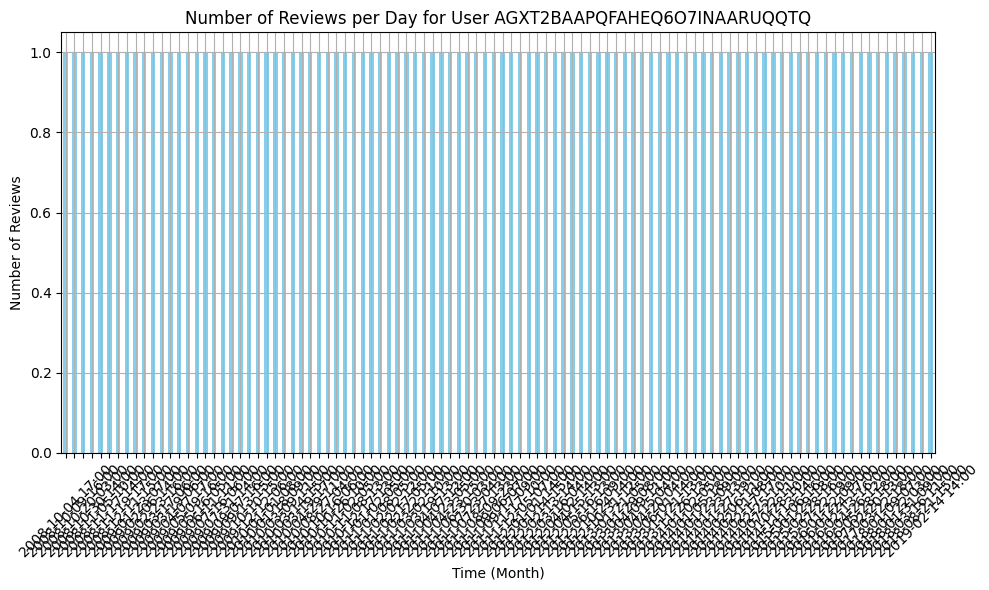

In [53]:
# Filter users with review_count >= 100
users_with_high_reviews = df[df['review_count'] >= 100]

# Plot for each user with review_count >= 100
for user_to_plot in users_with_high_reviews['user_id']:
    # Filter the DataFrame for the specific user
    user_df = df[df['user_id'] == user_to_plot]

    # Flatten the list of timestamps (since each row has a list of timestamps)
    user_timestamps = [ts for sublist in user_df['timestamps'].values for ts in sublist]

    # Sort the timestamps from earliest to latest
    sorted_timestamps = sorted(user_timestamps)

    # Create a new DataFrame with the sorted timestamps
    timestamps_df = pd.DataFrame(sorted_timestamps, columns=['timestamp'])

    # Group the reviews by month and count the number of reviews per month
    timestamps_df['timestamp'] = pd.to_datetime(timestamps_df['timestamp'])
    # grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('D')).size()
    # grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.hour).size()
    grouped_by_month = timestamps_df.groupby(timestamps_df['timestamp'].dt.to_period('H')).size()



    # Plot the number of reviews per month (non-cumulative)
    plt.figure(figsize=(10, 6))
    grouped_by_month.plot(kind='bar', color='skyblue')
    plt.title(f'Number of Reviews per Day for User {user_to_plot}')
    plt.xlabel('Time (Month)')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Show the plot for each user
    plt.tight_layout()
    plt.show()

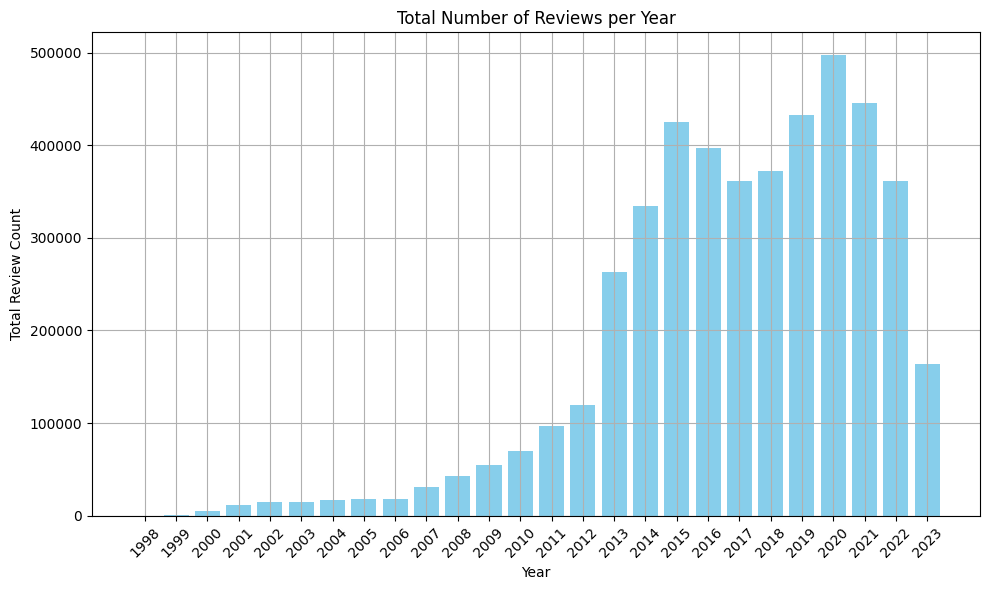

In [2]:
# Extract the year from each timestamp and create a new 'year' column
df['year'] = df['timestamps'].apply(lambda x: x[0].year if x else None)

# Group by 'year' and sum the review_count for each year
total_reviews_per_year = df.groupby('year')['review_count'].sum().reset_index()

# Create a list of all years within the range of your data
all_years = range(min(total_reviews_per_year['year']), max(total_reviews_per_year['year']) + 1)

# Ensure every year is in the dataset, even if it has 0 reviews
for year in all_years:
    if year not in total_reviews_per_year['year'].values:
        total_reviews_per_year = total_reviews_per_year.append({'year': year, 'review_count': 0}, ignore_index=True)

# Sort the data by year
total_reviews_per_year = total_reviews_per_year.sort_values('year')

# Plot the total number of reviews per year
plt.figure(figsize=(10, 6))
plt.bar(total_reviews_per_year['year'], total_reviews_per_year['review_count'], color='skyblue')
plt.title('Total Number of Reviews per Year')
plt.xlabel('Year')
plt.ylabel('Total Review Count')
plt.xticks(range(min(all_years), max(all_years) + 1), rotation=45)  # Show all years on the x-axis
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


### Extracting to CSV

In [ ]:
# Extract 'Year' and 'Month' from the first timestamp of each review
df['Year'] = df['timestamps'].apply(lambda x: x[0].year if x else None)
df['Month'] = df['timestamps'].apply(lambda x: x[0].month if x else None)

# Write the DataFrame to a CSV file
df.to_csv('anomaly_review.csv', index=False)

# Optionally, print the first few rows to confirm
print(df.head())

                        user_id  review_count  \
0  AHJRJCJMK3XVV4BSPBRAHIYEODWA           624   
1  AGMWACNMAG74AXBF7IJ22IOZSZPA           524   
2  AGIBXD3LM6HNDWWRTIOJHB5EKNFA           466   
3  AEWLQYBQDYWWUWK6UHHTNWO5AHYA           408   
4  AHEDJIDSPVYCB3GPRZKGO7YTK6XQ           346   

                                          timestamps  year  Year  Month  
0  [2007-02-21 11:04:28, 2006-09-13 07:21:31, 200...  2007  2007      2  
1  [2022-03-18 15:40:46.306000, 2022-06-24 15:20:...  2022  2022      3  
2  [2016-11-03 14:04:22, 2017-08-31 06:19:12.4590...  2016  2016     11  
3  [2012-02-27 06:18:29, 2007-04-17 06:01:21, 200...  2012  2012      2  
4  [2007-02-25 15:06:25, 2006-07-18 05:08:56, 200...  2007  2007      2  
